# L-Deep Neural Network Application
## Dogs vs. Monuments Classification

The below is an application that uses the deep_nn_model function, in addition to other helper functions, developed in the nn_toolkit. The addressed task covers the binary classification of Dogs images, obtained from the famous Kaggle Dogs vs. Cats competition image data, and various monuments images downloaded from Google image search using the term “monuments”.
The general application flow is as per the following:
1.	Importing necessary libraries.
2.	Reading in the images.
3.	Pre-processing and set up of train / test sets.
4.	Random check up on the processed images to ensure expected results are achieved.
5.	Standardizing the data for better training and fitting performance.
6.	Setting up the experiment to test multiple models with different hyperparameters of:
    * a.	Network Architecture (number of layers, neurons per layer).
    * b.	Number of Iterations (epochs).
    * c.	Learning Rates (alphas).
    * d.	Activation functions are chosen to be ReLU for all hidden layers and Sigmoid for the output layer.
7.	The resulting models are examined and the top performing ones are trained over longer epochs to analyse their test accuracies.
8.  The best model, based on test then train accuracies, is chosen and fine-tuned with regularizations if needed.
9.	New images, not used in the train or test sets, are used to validate the tuned final model.

Each of the above steps will be further explained as applied below. With that said, let’s get started with the first step.

## 1. Importing necessary libraries
The only module imported is the nn_toolkit as it internally imports all other nessacery libraries such as numpy, matplotlib, pandas…etc.

In [107]:
from nn_toolkit import * # Has all the fuctions needed to set up the images as train and test data sets, build the model, train, test, evaluate, and predict.
np.random.seed(seed = 321) # To set up the seed for reproduction proposes.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Reading in the images
The total size of the data set is 800 images, 400 of dogs and 400 of monuments. For more information on the functions used below, the nn_toolkit modul has
all the documentation for each of them 

In [2]:
path = getcwd() # get the working directory path which containes each set of images in a seperate folder.
dogs_path = path + '\\400DogPics\\' # 295 dogs images used as class 1.
monuments_path = path + '\\400MonumentPics\\' # 500 monumets images used as class 0.

## 3.	Pre-processing and set up of train / test sets.

In [3]:
# Reading in the images from the above paths and transforming them into arrays of the shapes displayed in the output below.
dogs_array, dogs_labels, dogs_rejected_pics = prepare_image_data(dogs_path, resize = 100, show_rejected_images = False) # doges are labeled as 1.
monuments_array, monuments_labels, monuments_rejected_pics = prepare_image_data(monuments_path, resize = 100, label_tag = 0, show_rejected_images = False)

Pics Array shape: (400, 100, 100, 3)
Labels Array shape: (1, 400)
Pics Array shape: (380, 100, 100, 3)
Labels Array shape: (1, 380)


In [4]:
# Merging, shuffling, and splitting the data into train and test sets. Below output shows the dimensions of the resulted sets where 20% of the data is left for testing.
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = merge_shuffle_split(dogs_array, dogs_labels, monuments_array, monuments_labels, validation_split = 0.2, seed = 42)

Output Shapes:
train_set_x_orig: (624, 100, 100, 3)
train_set_y: (1, 624)
test_set_x_orig: (156, 100, 100, 3)
test_set_y: (1, 156)


## 4. Random check up on the processed images to ensure expected results are achieved.

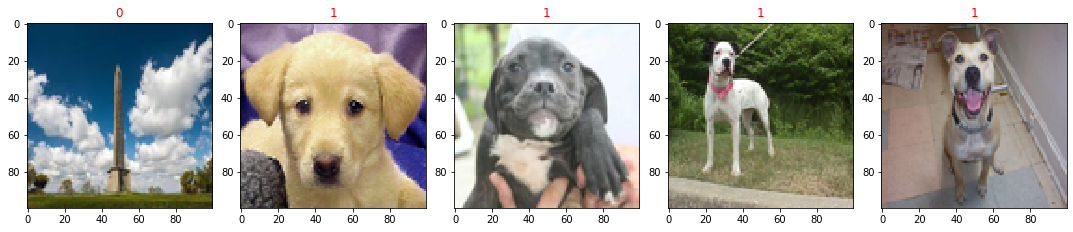

In [168]:
# Checking 6 images and thier labels form the train set.
random_image_check(num_images = 6, set_x = train_set_x_orig, set_y = train_set_y)

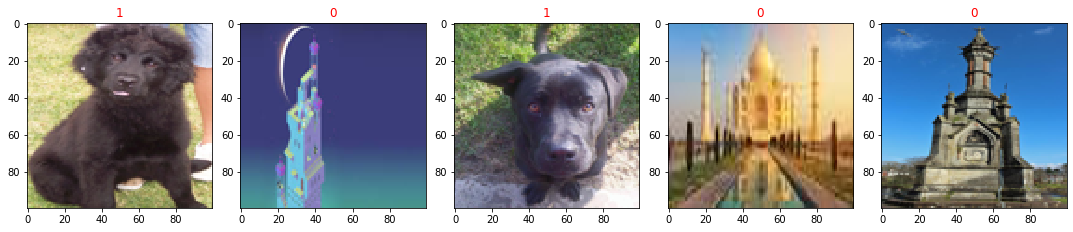

In [170]:
# Checking 6 images and thier labels form the test set.
random_image_check(num_images = 6, set_x = test_set_x_orig, set_y = test_set_y)

The check-up clears and we can see that both the labelling and the dimensions are correct (dimensions are 100 * 100 in hight and width).

## 5. Standardizing the data for better training and fitting performance.
There are many methods that can be used to standardize the data, however, in the case of images the division of each pixil by 255 (max pixel value) is sufficient.

In [7]:
# Flattening and Standerdizing the train_set_x_orig and test_set_x to better fit the model. Method = devision by the max pixel value 255.
train_set_x = prepare_image_arrays(train_set_x_orig)
test_set_x = prepare_image_arrays(test_set_x_orig)

Shape of Flatten and Standardized array: (30000, 624)
Shape of Flatten and Standardized array: (30000, 156)


## 6.	Setting up the experiment to test multiple models with different hyperparameters of:
     a.	Network Architecture (number of layers, neurons per layer).
     b.	Number of Iterations (epochs).
     c.	Learning Rates (alphas).
     d.	Activation functions are chosen to be ReLU for all hidden layers and Sigmoid for the output layer.

Setting up the experiment as follows:
* 6 model structures ranging from 1 to 4 hidden layers with arbitrary number of neurons: [1],  [4, 1],  [5, 1],  [8, 1],  [16, 5, 1],  [30, 17, 8, 1]
* Each with two sessions, one is for 300 epochs and the other is for 600 to observe the behaviour of the cost and accuracy.
* In each session, the model is trained 11 times over 11 different alphas form 0.001 up to 0.009 that are linearly equally spaced.
* The experiment will result in 6 * 2 * 11 = 132 models. These models are analysed and fillterd to a subset models.
* The filltered models are trained for longer epochs and the top performing (highest test then train accuracies) is chosen.
* The chosen model is tuned by training over long epoch and refining the overfitting by regularizing with L2 and/or dropouts.
* The tuned model is further validated by testing over new 'unseen' images for a final check.
* If the model checks out, it is then set and ready for produciton!

1 of 132 -------------------------------------------------- 2020-04-03 00:26:44.625917
Iteration 0 : Cost: 0.8399, Train Acc.: 50.0%
Iteration 250 : Cost: 0.3281, Train Acc.: 86.859%
Train Accuracy: 87.5%
Test Accuracy: 83.9744%


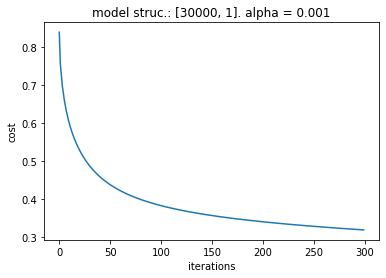

2 of 132 -------------------------------------------------- 2020-04-03 00:26:49.320067
Iteration 0 : Cost: 0.7051, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.3781, Train Acc.: 85.2564%
Train Accuracy: 85.5769%
Test Accuracy: 83.9744%


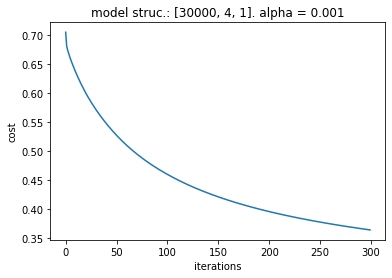

3 of 132 -------------------------------------------------- 2020-04-03 00:26:57.075074
Iteration 0 : Cost: 0.7004, Train Acc.: 46.3141%
Iteration 250 : Cost: 0.3426, Train Acc.: 86.0577%
Train Accuracy: 86.2179%
Test Accuracy: 83.3333%


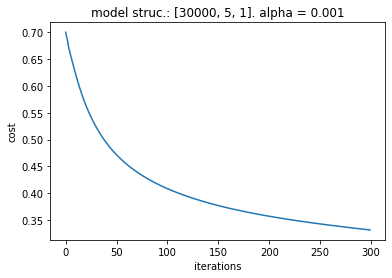

4 of 132 -------------------------------------------------- 2020-04-03 00:27:06.316693
Iteration 0 : Cost: 0.6807, Train Acc.: 56.891%
Iteration 250 : Cost: 0.2935, Train Acc.: 88.4615%
Train Accuracy: 89.4231%
Test Accuracy: 87.1795%


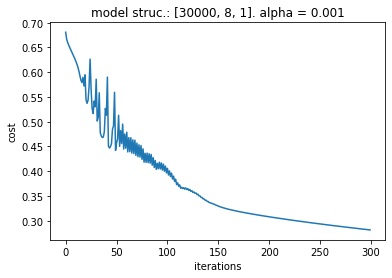

5 of 132 -------------------------------------------------- 2020-04-03 00:27:17.868166
Iteration 0 : Cost: 0.6935, Train Acc.: 50.0%
Iteration 250 : Cost: 0.4849, Train Acc.: 82.6923%
Train Accuracy: 83.1731%
Test Accuracy: 80.7692%


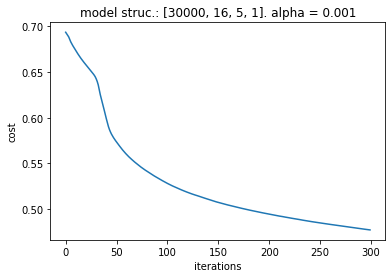

6 of 132 -------------------------------------------------- 2020-04-03 00:27:35.363240
Iteration 0 : Cost: 0.7391, Train Acc.: 47.4359%
Iteration 250 : Cost: 0.3392, Train Acc.: 86.3782%
Train Accuracy: 87.3397%
Test Accuracy: 85.2564%


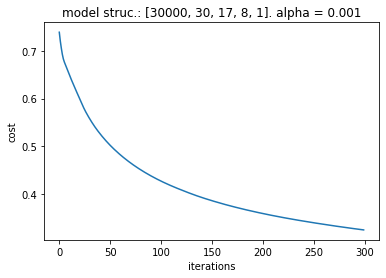

7 of 132 -------------------------------------------------- 2020-04-03 00:28:02.714694
Iteration 0 : Cost: 0.7067, Train Acc.: 53.5256%
Iteration 250 : Cost: 0.2972, Train Acc.: 88.3013%
Train Accuracy: 88.9423%
Test Accuracy: 84.6154%


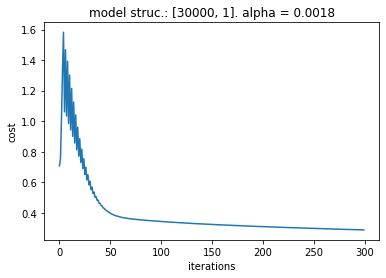

8 of 132 -------------------------------------------------- 2020-04-03 00:28:07.419195
Iteration 0 : Cost: 0.8274, Train Acc.: 49.6795%
Iteration 250 : Cost: 0.5802, Train Acc.: 77.7244%
Train Accuracy: 81.0897%
Test Accuracy: 78.8462%


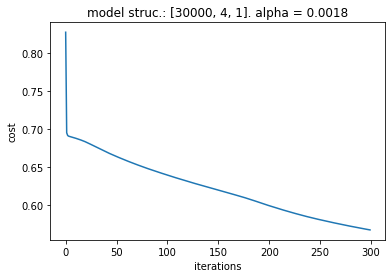

9 of 132 -------------------------------------------------- 2020-04-03 00:28:16.474281
Iteration 0 : Cost: 0.6655, Train Acc.: 50.0%
Iteration 250 : Cost: 0.3095, Train Acc.: 87.9808%
Train Accuracy: 88.3013%
Test Accuracy: 82.6923%


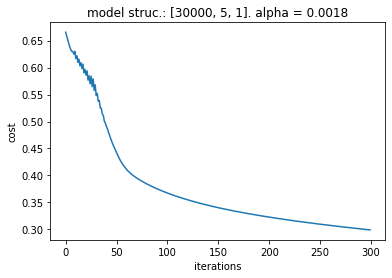

10 of 132 -------------------------------------------------- 2020-04-03 00:28:28.158033
Iteration 0 : Cost: 0.8563, Train Acc.: 50.0%
Iteration 250 : Cost: 0.5141, Train Acc.: 86.2179%
Train Accuracy: 87.3397%
Test Accuracy: 83.3333%


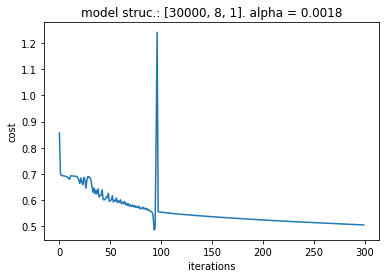

11 of 132 -------------------------------------------------- 2020-04-03 00:28:41.643375
Iteration 0 : Cost: 0.6927, Train Acc.: 53.2051%
Iteration 250 : Cost: 0.2773, Train Acc.: 88.6218%
Train Accuracy: 90.5449%
Test Accuracy: 84.6154%


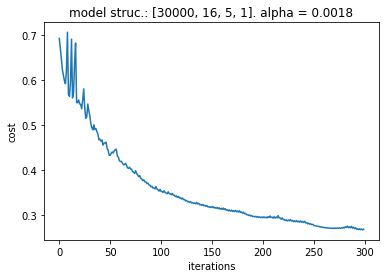

12 of 132 -------------------------------------------------- 2020-04-03 00:28:59.402463
Iteration 0 : Cost: 0.6954, Train Acc.: 50.8013%
Iteration 250 : Cost: 0.3226, Train Acc.: 87.9808%
Train Accuracy: 90.5449%
Test Accuracy: 86.5385%


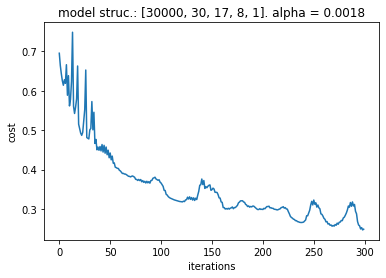

13 of 132 -------------------------------------------------- 2020-04-03 00:29:29.615826
Iteration 0 : Cost: 0.7132, Train Acc.: 48.5577%
Iteration 250 : Cost: 0.2826, Train Acc.: 88.6218%
Train Accuracy: 89.4231%
Test Accuracy: 84.6154%


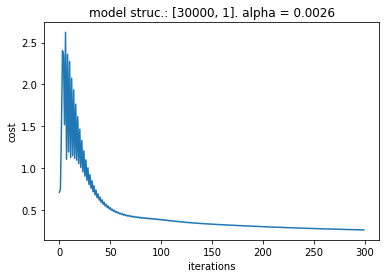

14 of 132 -------------------------------------------------- 2020-04-03 00:29:34.402992
Iteration 0 : Cost: 0.7474, Train Acc.: 45.5128%
Iteration 250 : Cost: 0.2784, Train Acc.: 88.7821%
Train Accuracy: 89.5833%
Test Accuracy: 85.8974%


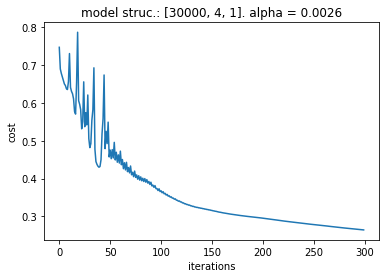

15 of 132 -------------------------------------------------- 2020-04-03 00:29:42.099178
Iteration 0 : Cost: 1.0542, Train Acc.: 50.0%
Iteration 250 : Cost: 0.5291, Train Acc.: 84.4551%
Train Accuracy: 85.2564%
Test Accuracy: 81.4103%


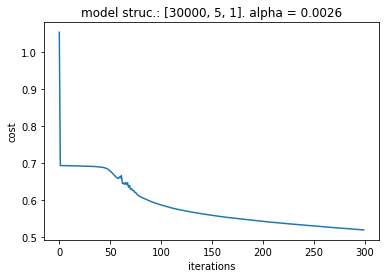

16 of 132 -------------------------------------------------- 2020-04-03 00:29:51.704759
Iteration 0 : Cost: 0.8354, Train Acc.: 46.7949%
Iteration 250 : Cost: 0.3309, Train Acc.: 86.5385%
Train Accuracy: 87.0192%
Test Accuracy: 83.9744%


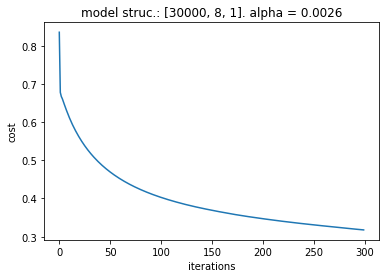

17 of 132 -------------------------------------------------- 2020-04-03 00:30:03.675412
Iteration 0 : Cost: 0.7548, Train Acc.: 35.5769%
Iteration 250 : Cost: 0.2722, Train Acc.: 89.1026%
Train Accuracy: 91.0256%
Test Accuracy: 84.6154%


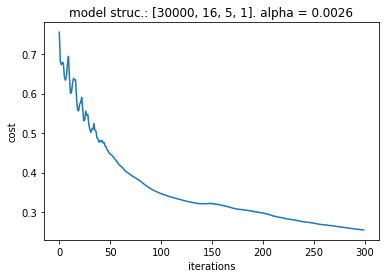

18 of 132 -------------------------------------------------- 2020-04-03 00:30:21.593719
Iteration 0 : Cost: 0.697, Train Acc.: 49.1987%
Iteration 250 : Cost: 0.2936, Train Acc.: 88.141%
Train Accuracy: 88.3013%
Test Accuracy: 83.9744%


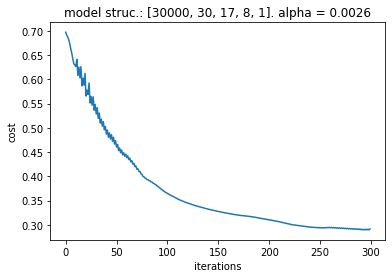

19 of 132 -------------------------------------------------- 2020-04-03 00:30:49.810706
Iteration 0 : Cost: 0.7212, Train Acc.: 46.1538%
Iteration 250 : Cost: 0.3478, Train Acc.: 86.859%
Train Accuracy: 86.5385%
Test Accuracy: 83.9744%


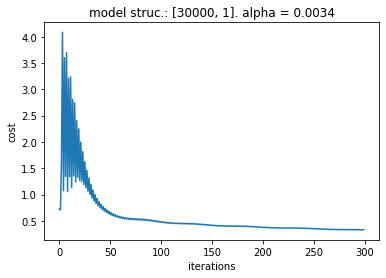

20 of 132 -------------------------------------------------- 2020-04-03 00:30:54.662960
Iteration 0 : Cost: 0.6947, Train Acc.: 45.5128%
Iteration 250 : Cost: 0.5214, Train Acc.: 84.4551%
Train Accuracy: 85.4167%
Test Accuracy: 83.9744%


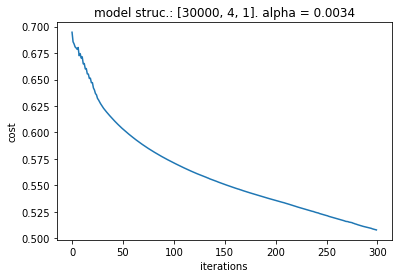

21 of 132 -------------------------------------------------- 2020-04-03 00:31:02.941479
Iteration 0 : Cost: 0.7018, Train Acc.: 50.0%
Iteration 250 : Cost: 0.2912, Train Acc.: 88.7821%
Train Accuracy: 89.4231%
Test Accuracy: 85.2564%


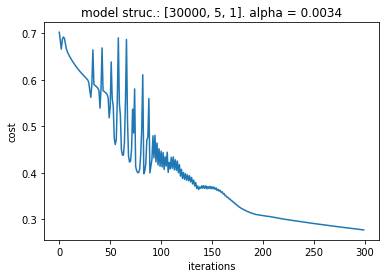

22 of 132 -------------------------------------------------- 2020-04-03 00:31:14.714771
Iteration 0 : Cost: 0.784, Train Acc.: 34.2949%
Iteration 250 : Cost: 0.3059, Train Acc.: 87.9808%
Train Accuracy: 88.3013%
Test Accuracy: 84.6154%


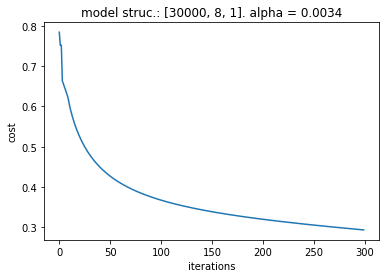

23 of 132 -------------------------------------------------- 2020-04-03 00:31:28.298312
Iteration 0 : Cost: 0.708, Train Acc.: 43.109%
Iteration 250 : Cost: 0.2883, Train Acc.: 89.5833%
Train Accuracy: 88.3013%
Test Accuracy: 85.2564%


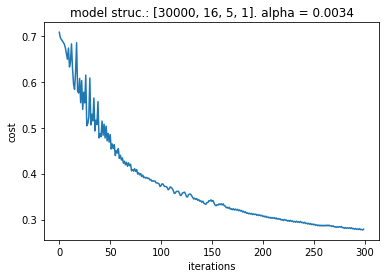

24 of 132 -------------------------------------------------- 2020-04-03 00:31:46.319713
Iteration 0 : Cost: 0.6979, Train Acc.: 41.0256%
Iteration 250 : Cost: 0.2858, Train Acc.: 89.2628%
Train Accuracy: 90.0641%
Test Accuracy: 83.9744%


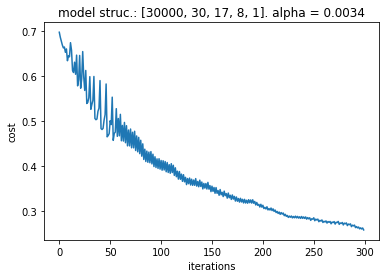

25 of 132 -------------------------------------------------- 2020-04-03 00:32:14.916803
Iteration 0 : Cost: 0.7233, Train Acc.: 48.7179%
Iteration 250 : Cost: 0.2917, Train Acc.: 88.7821%
Train Accuracy: 91.0256%
Test Accuracy: 83.3333%


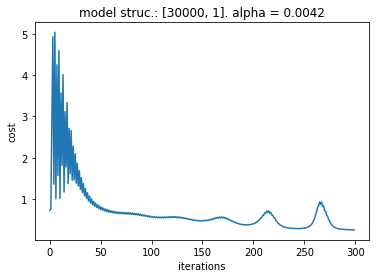

26 of 132 -------------------------------------------------- 2020-04-03 00:32:19.600956
Iteration 0 : Cost: 0.7236, Train Acc.: 49.359%
Iteration 250 : Cost: 0.4725, Train Acc.: 84.6154%
Train Accuracy: 85.7372%
Test Accuracy: 81.4103%


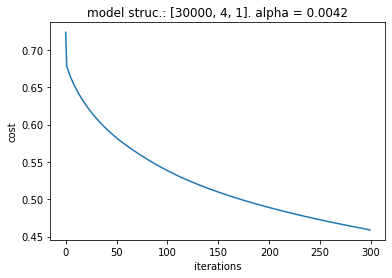

27 of 132 -------------------------------------------------- 2020-04-03 00:32:27.056932
Iteration 0 : Cost: 0.6838, Train Acc.: 55.4487%
Iteration 250 : Cost: 0.3003, Train Acc.: 87.5%
Train Accuracy: 87.9808%
Test Accuracy: 83.9744%


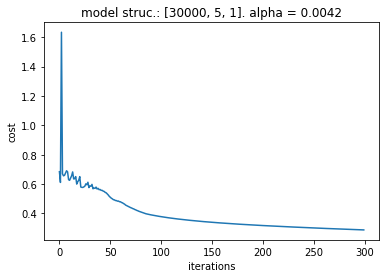

28 of 132 -------------------------------------------------- 2020-04-03 00:32:36.333961
Iteration 0 : Cost: 1.0009, Train Acc.: 50.0%
Iteration 250 : Cost: 0.5337, Train Acc.: 83.1731%
Train Accuracy: 84.4551%
Test Accuracy: 82.6923%


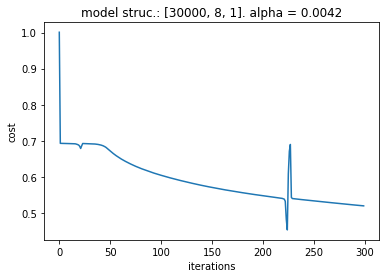

29 of 132 -------------------------------------------------- 2020-04-03 00:32:48.088306
Iteration 0 : Cost: 0.8478, Train Acc.: 50.0%
Iteration 250 : Cost: 0.31, Train Acc.: 87.0192%
Train Accuracy: 89.1026%
Test Accuracy: 85.2564%


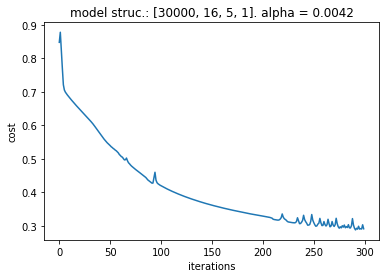

30 of 132 -------------------------------------------------- 2020-04-03 00:33:05.745244
Iteration 0 : Cost: 0.7019, Train Acc.: 48.7179%
Iteration 250 : Cost: 0.2976, Train Acc.: 87.5%
Train Accuracy: 89.5833%
Test Accuracy: 84.6154%


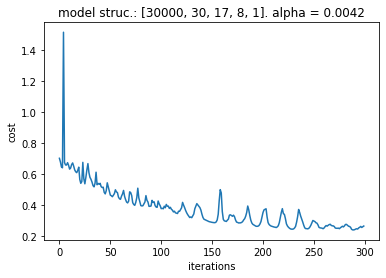

31 of 132 -------------------------------------------------- 2020-04-03 00:33:33.863161
Iteration 0 : Cost: 0.8034, Train Acc.: 50.0%
Iteration 250 : Cost: 0.2979, Train Acc.: 88.6218%
Train Accuracy: 90.2244%
Test Accuracy: 83.3333%


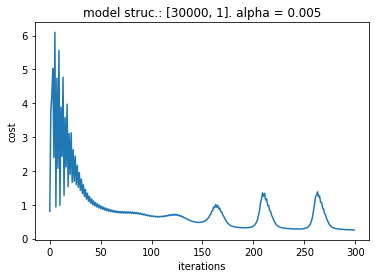

32 of 132 -------------------------------------------------- 2020-04-03 00:33:38.514625
Iteration 0 : Cost: 1.4554, Train Acc.: 50.3205%
Iteration 250 : Cost: 0.5097, Train Acc.: 85.0962%
Train Accuracy: 86.3782%
Test Accuracy: 83.3333%


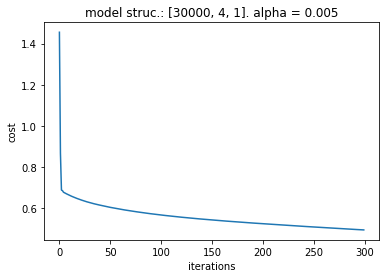

33 of 132 -------------------------------------------------- 2020-04-03 00:33:46.005051
Iteration 0 : Cost: 0.7018, Train Acc.: 51.4423%
Iteration 250 : Cost: 0.2972, Train Acc.: 88.4615%
Train Accuracy: 89.1026%
Test Accuracy: 83.9744%


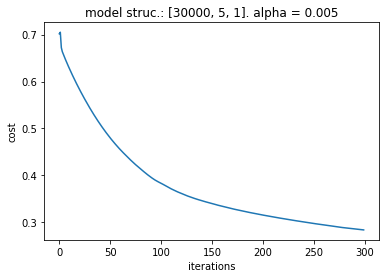

34 of 132 -------------------------------------------------- 2020-04-03 00:33:55.335054
Iteration 0 : Cost: 0.8516, Train Acc.: 49.8397%
Iteration 250 : Cost: 0.4958, Train Acc.: 84.7756%
Train Accuracy: 88.3013%
Test Accuracy: 82.6923%


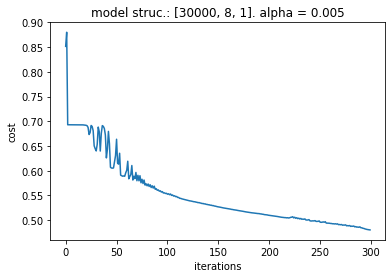

35 of 132 -------------------------------------------------- 2020-04-03 00:34:07.211943
Iteration 0 : Cost: 0.6987, Train Acc.: 50.0%
Iteration 250 : Cost: 0.2947, Train Acc.: 88.3013%
Train Accuracy: 88.7821%
Test Accuracy: 88.4615%


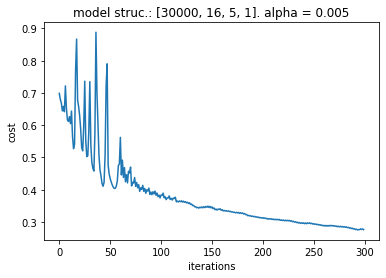

36 of 132 -------------------------------------------------- 2020-04-03 00:34:24.928679
Iteration 0 : Cost: 0.7145, Train Acc.: 49.8397%
Iteration 250 : Cost: 0.3009, Train Acc.: 87.9808%
Train Accuracy: 88.4615%
Test Accuracy: 83.3333%


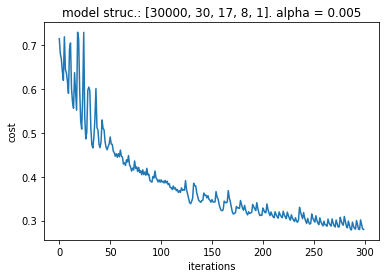

37 of 132 -------------------------------------------------- 2020-04-03 00:34:52.516145
Iteration 0 : Cost: 0.7712, Train Acc.: 50.641%
Iteration 250 : Cost: 0.297, Train Acc.: 90.0641%
Train Accuracy: 90.2244%
Test Accuracy: 85.2564%


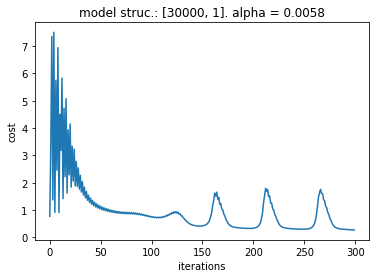

38 of 132 -------------------------------------------------- 2020-04-03 00:34:57.164481
Iteration 0 : Cost: 0.7805, Train Acc.: 50.0%
Iteration 250 : Cost: 0.5397, Train Acc.: 83.0128%
Train Accuracy: 84.4551%
Test Accuracy: 82.6923%


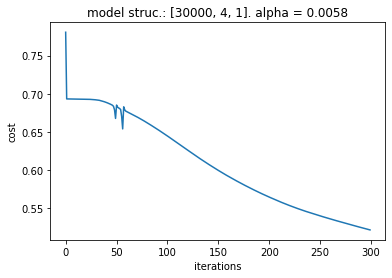

39 of 132 -------------------------------------------------- 2020-04-03 00:35:04.732024
Iteration 0 : Cost: 0.6894, Train Acc.: 54.1667%
Iteration 250 : Cost: 0.2874, Train Acc.: 88.4615%
Train Accuracy: 87.9808%
Test Accuracy: 83.3333%


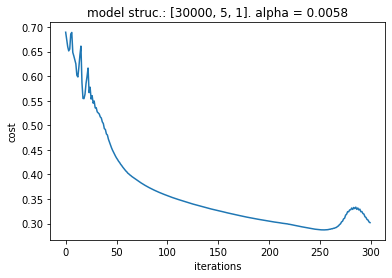

40 of 132 -------------------------------------------------- 2020-04-03 00:35:14.187179
Iteration 0 : Cost: 0.6988, Train Acc.: 53.3654%
Iteration 250 : Cost: 0.3061, Train Acc.: 87.9808%
Train Accuracy: 88.6218%
Test Accuracy: 85.2564%


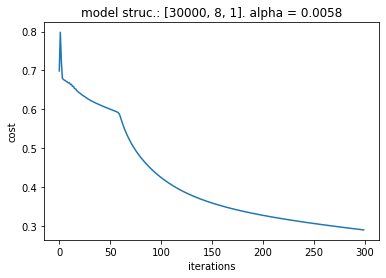

41 of 132 -------------------------------------------------- 2020-04-03 00:35:26.022726
Iteration 0 : Cost: 0.73, Train Acc.: 51.2821%
Iteration 250 : Cost: 0.3314, Train Acc.: 86.6987%
Train Accuracy: 87.9808%
Test Accuracy: 85.2564%


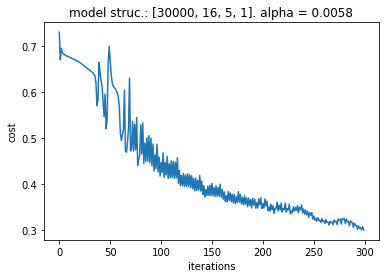

42 of 132 -------------------------------------------------- 2020-04-03 00:35:43.234686
Iteration 0 : Cost: 0.6985, Train Acc.: 42.6282%
Iteration 250 : Cost: 0.2995, Train Acc.: 88.3013%
Train Accuracy: 87.9808%
Test Accuracy: 83.3333%


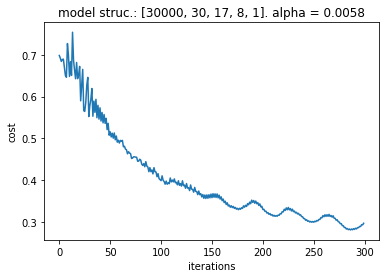

43 of 132 -------------------------------------------------- 2020-04-03 00:36:10.766029
Iteration 0 : Cost: 0.746, Train Acc.: 48.7179%
Iteration 250 : Cost: 0.3197, Train Acc.: 89.9038%
Train Accuracy: 90.3846%
Test Accuracy: 85.8974%


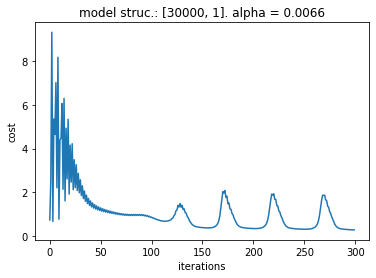

44 of 132 -------------------------------------------------- 2020-04-03 00:36:15.482417
Iteration 0 : Cost: 0.7579, Train Acc.: 47.7564%
Iteration 250 : Cost: 0.6033, Train Acc.: 66.3462%
Train Accuracy: 76.2821%
Test Accuracy: 75.0%


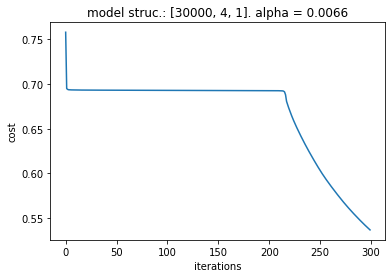

45 of 132 -------------------------------------------------- 2020-04-03 00:36:23.335804
Iteration 0 : Cost: 0.7921, Train Acc.: 50.0%
Iteration 250 : Cost: 0.5078, Train Acc.: 86.3782%
Train Accuracy: 87.0192%
Test Accuracy: 83.3333%


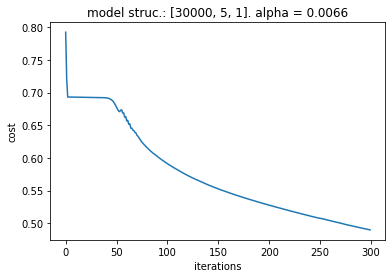

46 of 132 -------------------------------------------------- 2020-04-03 00:36:32.652008
Iteration 0 : Cost: 0.7144, Train Acc.: 44.2308%
Iteration 250 : Cost: 0.4361, Train Acc.: 89.5833%
Train Accuracy: 87.6603%
Test Accuracy: 85.8974%


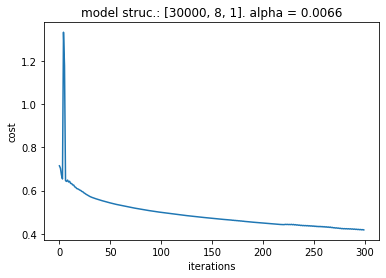

47 of 132 -------------------------------------------------- 2020-04-03 00:36:44.333109
Iteration 0 : Cost: 0.802, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.2903, Train Acc.: 88.7821%
Train Accuracy: 87.8205%
Test Accuracy: 87.1795%


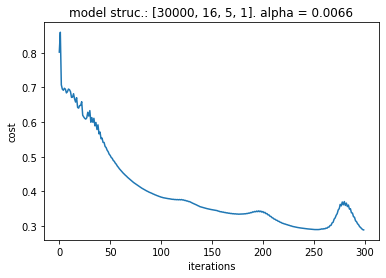

48 of 132 -------------------------------------------------- 2020-04-03 00:37:02.018836
Iteration 0 : Cost: 0.7302, Train Acc.: 51.2821%
Iteration 250 : Cost: 0.3065, Train Acc.: 86.6987%
Train Accuracy: 87.1795%
Test Accuracy: 79.4872%


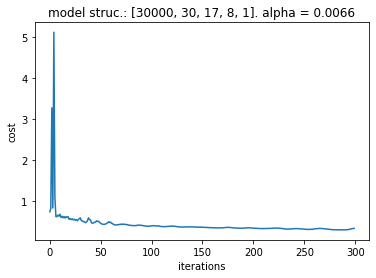

49 of 132 -------------------------------------------------- 2020-04-03 00:37:33.755375
Iteration 0 : Cost: 0.7282, Train Acc.: 41.9872%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:303: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = - np.sum(np.add(np.dot(Y, np.log(A['A' + str(L)].T)), np.dot(1 - Y, np.log(1 - A['A' + str(L)].T)))) / m # calculates the cross entropy (first part of the cost).
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:321: RuntimeWarning: invalid value encountered in true_divide
  dA['dA' + str(L)] = - (np.divide(Y, A['A' + str(L)]) - np.divide(1 - Y, 1 - A['A' + str(L)])) # initializing backward propagation.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:314: RuntimeWarning: invalid value encountered in greater
  Yhat_train = np.array((Yhat_train > 0.5) * 1).reshape(1, m) # converting to 0s and 1s based on 0.5 threshold.


Iteration 250 : Cost: nan, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:354: RuntimeWarning: invalid value encountered in greater
  Yhat_test = np.array((Yhat_test > 0.5) * 1).reshape(1, m_test) # converting to 0s and 1s based on 0.5 threshold.


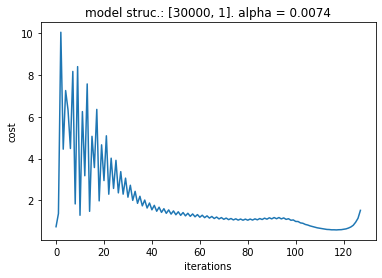

50 of 132 -------------------------------------------------- 2020-04-03 00:37:38.424045
Iteration 0 : Cost: 0.7661, Train Acc.: 50.0%
Iteration 250 : Cost: 0.6931, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 56.4103%


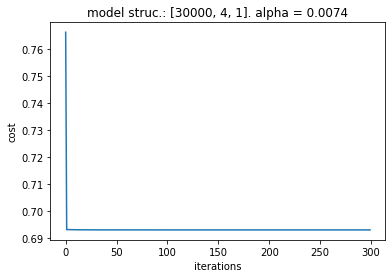

51 of 132 -------------------------------------------------- 2020-04-03 00:37:45.881710
Iteration 0 : Cost: 0.7308, Train Acc.: 45.1923%
Iteration 250 : Cost: 0.3126, Train Acc.: 86.5385%
Train Accuracy: 87.8205%
Test Accuracy: 86.5385%


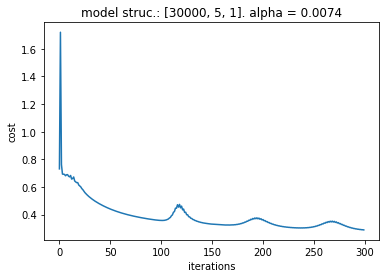

52 of 132 -------------------------------------------------- 2020-04-03 00:37:55.019492
Iteration 0 : Cost: 0.8779, Train Acc.: 50.0%
Iteration 250 : Cost: 0.4482, Train Acc.: 85.7372%
Train Accuracy: 88.3013%
Test Accuracy: 83.3333%


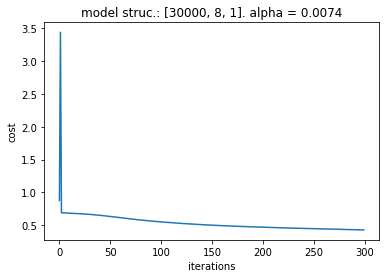

53 of 132 -------------------------------------------------- 2020-04-03 00:38:06.822660
Iteration 0 : Cost: 0.6916, Train Acc.: 52.8846%
Iteration 250 : Cost: 0.2983, Train Acc.: 87.8205%
Train Accuracy: 87.3397%
Test Accuracy: 85.2564%


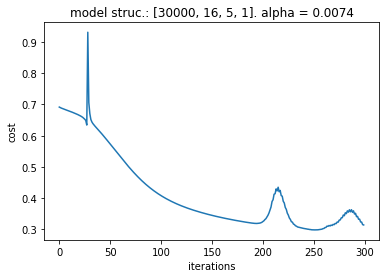

54 of 132 -------------------------------------------------- 2020-04-03 00:38:24.246550
Iteration 0 : Cost: 0.6709, Train Acc.: 63.141%
Iteration 250 : Cost: 0.2729, Train Acc.: 89.2628%
Train Accuracy: 90.5449%
Test Accuracy: 85.2564%


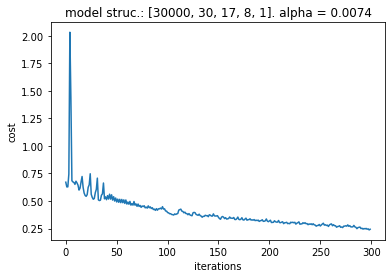

55 of 132 -------------------------------------------------- 2020-04-03 00:38:51.827353
Iteration 0 : Cost: 0.7873, Train Acc.: 49.359%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:303: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = - np.sum(np.add(np.dot(Y, np.log(A['A' + str(L)].T)), np.dot(1 - Y, np.log(1 - A['A' + str(L)].T)))) / m # calculates the cross entropy (first part of the cost).
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:321: RuntimeWarning: invalid value encountered in true_divide
  dA['dA' + str(L)] = - (np.divide(Y, A['A' + str(L)]) - np.divide(1 - Y, 1 - A['A' + str(L)])) # initializing backward propagation.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:314: RuntimeWarning: invalid value encountered in greater
  Yhat_train = np.array((Yhat_train > 0.5) * 1).reshape(1, m) # converting to 0s and 1s based on 0.5 threshold.


Iteration 250 : Cost: nan, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:354: RuntimeWarning: invalid value encountered in greater
  Yhat_test = np.array((Yhat_test > 0.5) * 1).reshape(1, m_test) # converting to 0s and 1s based on 0.5 threshold.


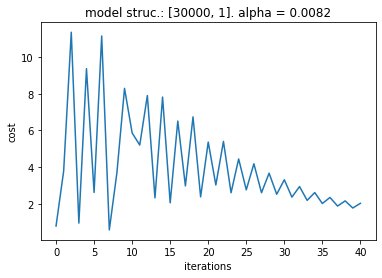

56 of 132 -------------------------------------------------- 2020-04-03 00:38:56.588252
Iteration 0 : Cost: 0.7121, Train Acc.: 41.9872%
Iteration 250 : Cost: 0.5134, Train Acc.: 85.2564%
Train Accuracy: 86.3782%
Test Accuracy: 82.0513%


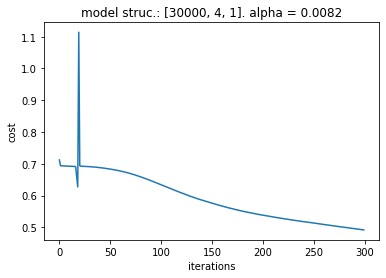

57 of 132 -------------------------------------------------- 2020-04-03 00:39:03.694984
Iteration 0 : Cost: 0.7537, Train Acc.: 35.8974%
Iteration 250 : Cost: 0.3171, Train Acc.: 87.3397%
Train Accuracy: 87.9808%
Test Accuracy: 82.0513%


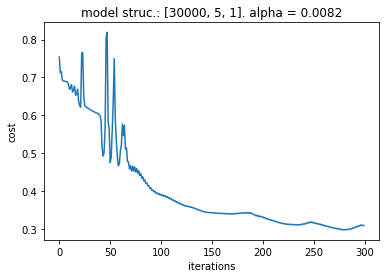

58 of 132 -------------------------------------------------- 2020-04-03 00:39:13.295591
Iteration 0 : Cost: 0.6858, Train Acc.: 56.25%
Iteration 250 : Cost: 0.5182, Train Acc.: 86.0577%
Train Accuracy: 86.3782%
Test Accuracy: 82.0513%


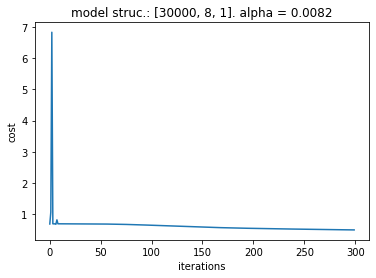

59 of 132 -------------------------------------------------- 2020-04-03 00:39:25.113347
Iteration 0 : Cost: 0.7413, Train Acc.: 48.0769%
Iteration 250 : Cost: 0.3106, Train Acc.: 87.8205%
Train Accuracy: 87.5%
Test Accuracy: 82.0513%


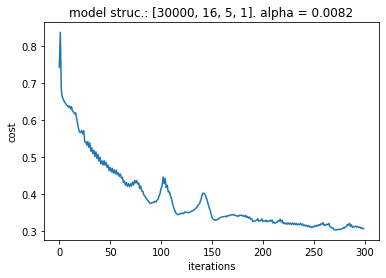

60 of 132 -------------------------------------------------- 2020-04-03 00:39:42.301372
Iteration 0 : Cost: 1.0428, Train Acc.: 50.0%
Iteration 250 : Cost: 0.4576, Train Acc.: 89.5833%
Train Accuracy: 87.0192%
Test Accuracy: 86.5385%


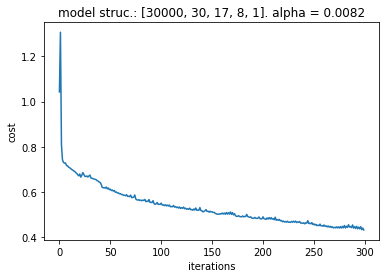

61 of 132 -------------------------------------------------- 2020-04-03 00:40:09.422974
Iteration 0 : Cost: 0.7936, Train Acc.: 49.359%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:303: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = - np.sum(np.add(np.dot(Y, np.log(A['A' + str(L)].T)), np.dot(1 - Y, np.log(1 - A['A' + str(L)].T)))) / m # calculates the cross entropy (first part of the cost).
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:321: RuntimeWarning: invalid value encountered in true_divide
  dA['dA' + str(L)] = - (np.divide(Y, A['A' + str(L)]) - np.divide(1 - Y, 1 - A['A' + str(L)])) # initializing backward propagation.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:314: RuntimeWarning: invalid value encountered in greater
  Yhat_train = np.array((Yhat_train > 0.5) * 1).reshape(1, m) # converting to 0s and 1s based on 0.5 threshold.


Iteration 250 : Cost: nan, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:354: RuntimeWarning: invalid value encountered in greater
  Yhat_test = np.array((Yhat_test > 0.5) * 1).reshape(1, m_test) # converting to 0s and 1s based on 0.5 threshold.


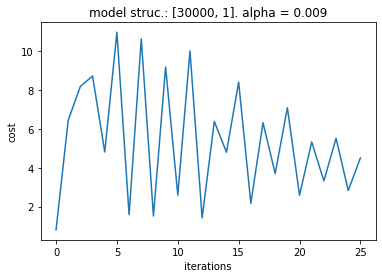

62 of 132 -------------------------------------------------- 2020-04-03 00:40:14.186672
Iteration 0 : Cost: 0.6877, Train Acc.: 56.4103%
Iteration 250 : Cost: 0.693, Train Acc.: 50.3205%
Train Accuracy: 50.3205%
Test Accuracy: 55.7692%


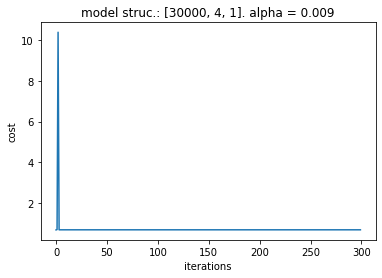

63 of 132 -------------------------------------------------- 2020-04-03 00:40:21.722077
Iteration 0 : Cost: 0.7249, Train Acc.: 43.4295%
Iteration 250 : Cost: 0.3221, Train Acc.: 87.0192%
Train Accuracy: 87.0192%
Test Accuracy: 83.3333%


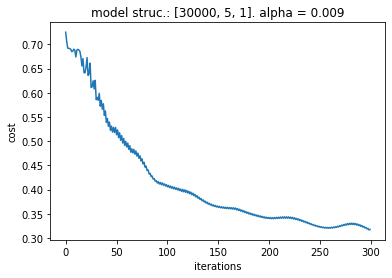

64 of 132 -------------------------------------------------- 2020-04-03 00:40:31.600251
Iteration 0 : Cost: 0.706, Train Acc.: 46.1538%
Iteration 250 : Cost: 0.3499, Train Acc.: 86.5385%
Train Accuracy: 87.5%
Test Accuracy: 83.9744%


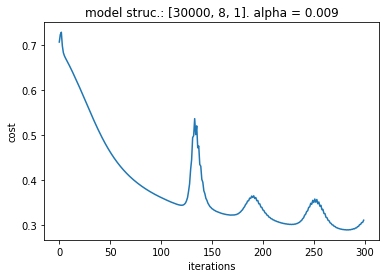

65 of 132 -------------------------------------------------- 2020-04-03 00:40:43.081485
Iteration 0 : Cost: 0.7538, Train Acc.: 44.8718%
Iteration 250 : Cost: 0.3169, Train Acc.: 87.6603%
Train Accuracy: 87.6603%
Test Accuracy: 83.9744%


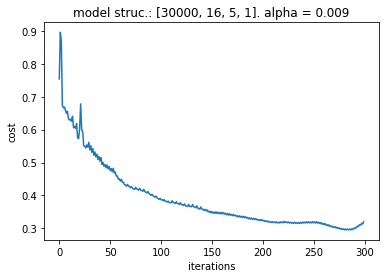

66 of 132 -------------------------------------------------- 2020-04-03 00:41:00.456989
Iteration 0 : Cost: 0.709, Train Acc.: 43.4295%
Iteration 250 : Cost: 0.2995, Train Acc.: 87.6603%
Train Accuracy: 88.3013%
Test Accuracy: 83.9744%


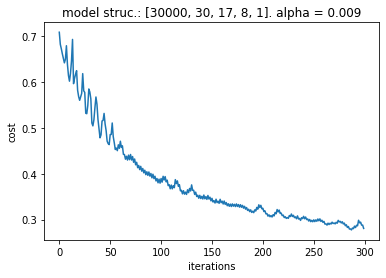

67 of 132 -------------------------------------------------- 2020-04-03 00:41:27.782870
Iteration 0 : Cost: 0.7908, Train Acc.: 41.5064%
Iteration 250 : Cost: 0.3263, Train Acc.: 88.4615%
Iteration 500 : Cost: 0.2893, Train Acc.: 89.2628%
Train Accuracy: 89.5833%
Test Accuracy: 87.1795%


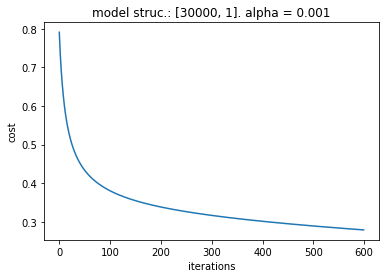

68 of 132 -------------------------------------------------- 2020-04-03 00:41:37.039425
Iteration 0 : Cost: 0.7657, Train Acc.: 49.8397%
Iteration 250 : Cost: 0.6912, Train Acc.: 50.9615%
Iteration 500 : Cost: 0.5434, Train Acc.: 76.2821%
Train Accuracy: 79.0064%
Test Accuracy: 77.5641%


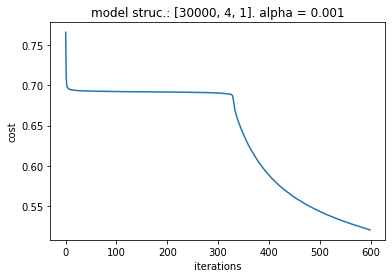

69 of 132 -------------------------------------------------- 2020-04-03 00:41:52.124452
Iteration 0 : Cost: 0.6839, Train Acc.: 58.3333%
Iteration 250 : Cost: 0.3367, Train Acc.: 86.0577%
Iteration 500 : Cost: 0.2952, Train Acc.: 88.4615%
Train Accuracy: 89.7436%
Test Accuracy: 83.3333%


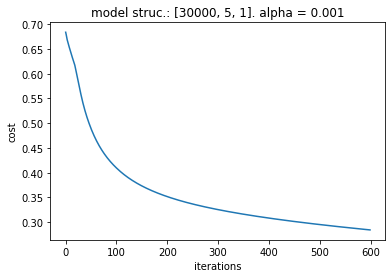

70 of 132 -------------------------------------------------- 2020-04-03 00:42:10.353429
Iteration 0 : Cost: 0.709, Train Acc.: 52.7244%
Iteration 250 : Cost: 0.2858, Train Acc.: 88.9423%
Iteration 500 : Cost: 0.241, Train Acc.: 91.5064%
Train Accuracy: 91.9872%
Test Accuracy: 85.2564%


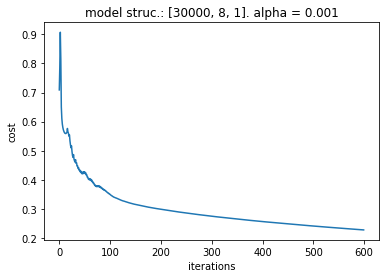

71 of 132 -------------------------------------------------- 2020-04-03 00:42:33.513587
Iteration 0 : Cost: 0.689, Train Acc.: 49.6795%
Iteration 250 : Cost: 0.2893, Train Acc.: 88.4615%
Iteration 500 : Cost: 0.2194, Train Acc.: 92.1474%
Train Accuracy: 93.5897%
Test Accuracy: 85.8974%


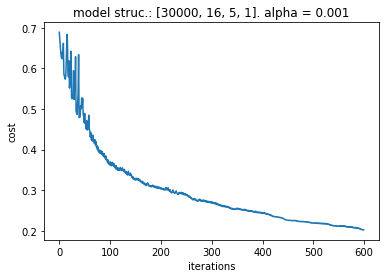

72 of 132 -------------------------------------------------- 2020-04-03 00:43:08.561617
Iteration 0 : Cost: 0.736, Train Acc.: 49.5192%
Iteration 250 : Cost: 0.2716, Train Acc.: 90.0641%
Iteration 500 : Cost: 0.1982, Train Acc.: 93.9103%
Train Accuracy: 93.75%
Test Accuracy: 85.8974%


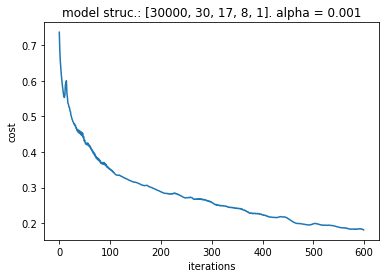

73 of 132 -------------------------------------------------- 2020-04-03 00:44:02.933170
Iteration 0 : Cost: 0.7055, Train Acc.: 47.9167%
Iteration 250 : Cost: 0.2993, Train Acc.: 88.3013%
Iteration 500 : Cost: 0.2584, Train Acc.: 90.8654%
Train Accuracy: 91.6667%
Test Accuracy: 83.9744%


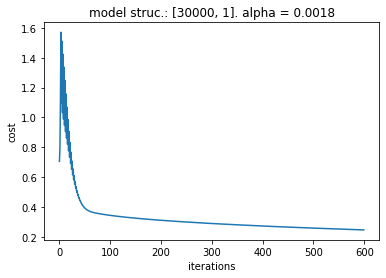

74 of 132 -------------------------------------------------- 2020-04-03 00:44:12.202699
Iteration 0 : Cost: 0.7748, Train Acc.: 47.9167%
Iteration 250 : Cost: 0.5321, Train Acc.: 84.1346%
Iteration 500 : Cost: 0.4948, Train Acc.: 87.3397%
Train Accuracy: 88.3013%
Test Accuracy: 83.9744%


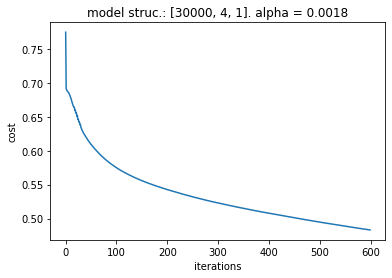

75 of 132 -------------------------------------------------- 2020-04-03 00:44:27.265884
Iteration 0 : Cost: 0.7127, Train Acc.: 50.641%
Iteration 250 : Cost: 0.3183, Train Acc.: 87.3397%
Iteration 500 : Cost: 0.277, Train Acc.: 88.9423%
Train Accuracy: 90.2244%
Test Accuracy: 82.0513%


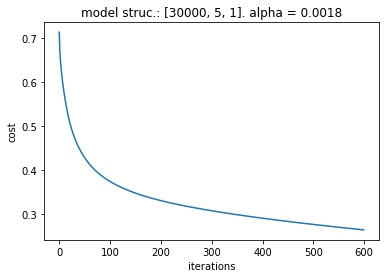

76 of 132 -------------------------------------------------- 2020-04-03 00:44:45.922636
Iteration 0 : Cost: 0.7181, Train Acc.: 41.0256%
Iteration 250 : Cost: 0.3506, Train Acc.: 86.3782%
Iteration 500 : Cost: 0.3023, Train Acc.: 88.3013%
Train Accuracy: 89.2628%
Test Accuracy: 85.2564%


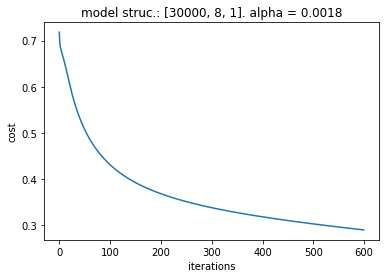

77 of 132 -------------------------------------------------- 2020-04-03 00:45:09.126620
Iteration 0 : Cost: 0.6827, Train Acc.: 55.4487%
Iteration 250 : Cost: 0.2821, Train Acc.: 89.4231%
Iteration 500 : Cost: 0.2219, Train Acc.: 92.1474%
Train Accuracy: 93.2692%
Test Accuracy: 86.5385%


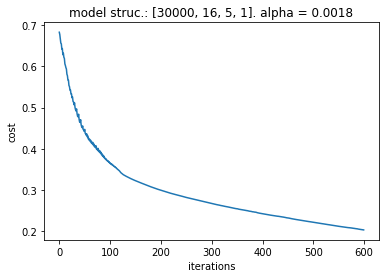

78 of 132 -------------------------------------------------- 2020-04-03 00:45:44.068286
Iteration 0 : Cost: 0.7688, Train Acc.: 50.0%
Iteration 250 : Cost: 0.307, Train Acc.: 88.4615%
Iteration 500 : Cost: 0.257, Train Acc.: 90.5449%
Train Accuracy: 90.5449%
Test Accuracy: 83.3333%


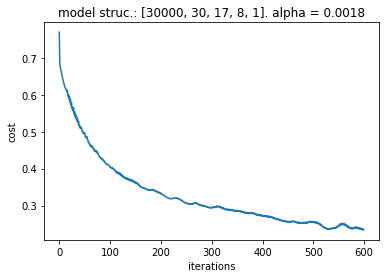

79 of 132 -------------------------------------------------- 2020-04-03 00:46:38.346540
Iteration 0 : Cost: 0.8852, Train Acc.: 50.0%
Iteration 250 : Cost: 0.277, Train Acc.: 89.2628%
Iteration 500 : Cost: 0.2259, Train Acc.: 91.9872%
Train Accuracy: 92.4679%
Test Accuracy: 83.9744%


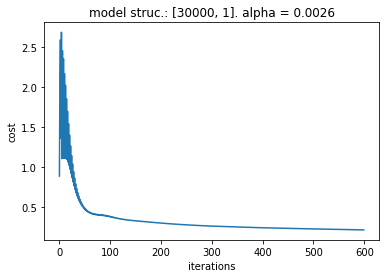

80 of 132 -------------------------------------------------- 2020-04-03 00:46:47.372941
Iteration 0 : Cost: 0.7127, Train Acc.: 49.8397%
Iteration 250 : Cost: 0.5674, Train Acc.: 79.4872%
Iteration 500 : Cost: 0.5054, Train Acc.: 86.0577%
Train Accuracy: 87.0192%
Test Accuracy: 82.0513%


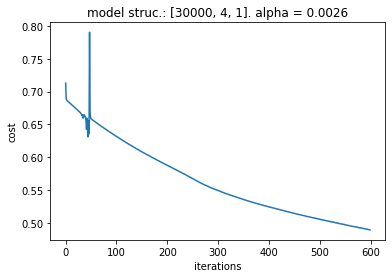

81 of 132 -------------------------------------------------- 2020-04-03 00:47:02.382901
Iteration 0 : Cost: 0.6969, Train Acc.: 53.8462%
Iteration 250 : Cost: 0.2948, Train Acc.: 88.4615%
Iteration 500 : Cost: 0.2463, Train Acc.: 90.8654%
Train Accuracy: 92.1474%
Test Accuracy: 85.8974%


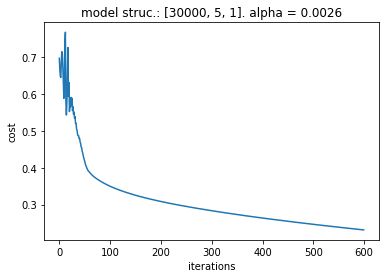

82 of 132 -------------------------------------------------- 2020-04-03 00:47:20.424949
Iteration 0 : Cost: 0.9195, Train Acc.: 50.0%
Iteration 250 : Cost: 0.3401, Train Acc.: 86.3782%
Iteration 500 : Cost: 0.2725, Train Acc.: 89.1026%
Train Accuracy: 90.2244%
Test Accuracy: 83.9744%


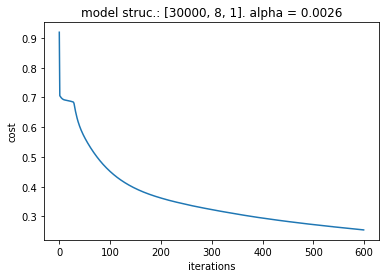

83 of 132 -------------------------------------------------- 2020-04-03 00:47:44.092645
Iteration 0 : Cost: 0.7115, Train Acc.: 50.0%
Iteration 250 : Cost: 0.2942, Train Acc.: 88.7821%
Iteration 500 : Cost: 0.2415, Train Acc.: 91.3462%
Train Accuracy: 92.6282%
Test Accuracy: 85.2564%


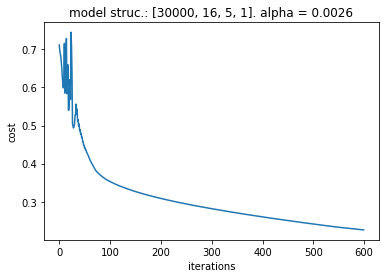

84 of 132 -------------------------------------------------- 2020-04-03 00:48:18.492288
Iteration 0 : Cost: 0.7222, Train Acc.: 49.1987%
Iteration 250 : Cost: 0.3171, Train Acc.: 87.8205%
Iteration 500 : Cost: 0.2676, Train Acc.: 90.5449%
Train Accuracy: 89.5833%
Test Accuracy: 84.6154%


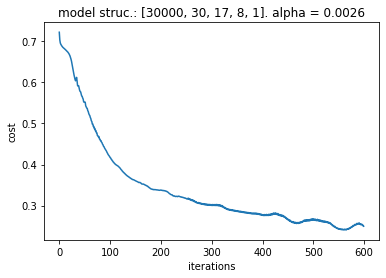

85 of 132 -------------------------------------------------- 2020-04-03 00:49:12.596213
Iteration 0 : Cost: 0.7771, Train Acc.: 48.2372%
Iteration 250 : Cost: 0.3513, Train Acc.: 86.6987%
Iteration 500 : Cost: 0.2522, Train Acc.: 90.7051%
Train Accuracy: 91.3462%
Test Accuracy: 83.3333%


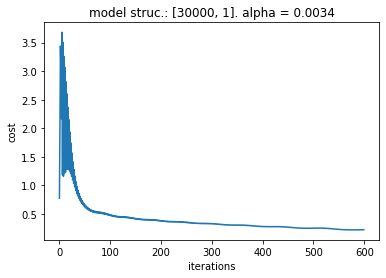

86 of 132 -------------------------------------------------- 2020-04-03 00:49:21.774430
Iteration 0 : Cost: 0.7767, Train Acc.: 50.0%
Iteration 250 : Cost: 0.44, Train Acc.: 83.9744%
Iteration 500 : Cost: 0.3034, Train Acc.: 88.3013%
Train Accuracy: 89.5833%
Test Accuracy: 84.6154%


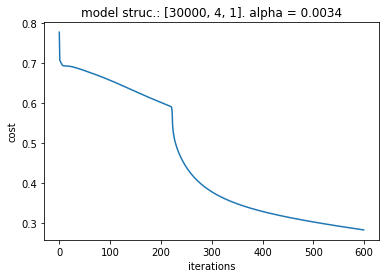

87 of 132 -------------------------------------------------- 2020-04-03 00:49:37.298865
Iteration 0 : Cost: 0.7256, Train Acc.: 45.0321%
Iteration 250 : Cost: 0.3736, Train Acc.: 85.8974%
Iteration 500 : Cost: 0.2984, Train Acc.: 88.9423%
Train Accuracy: 90.2244%
Test Accuracy: 85.2564%


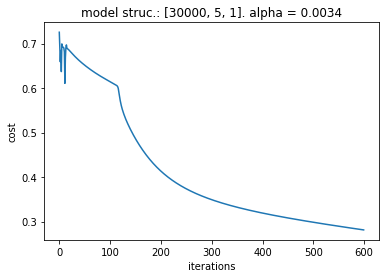

88 of 132 -------------------------------------------------- 2020-04-03 00:49:55.590641
Iteration 0 : Cost: 0.695, Train Acc.: 45.9936%
Iteration 250 : Cost: 0.2989, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.2402, Train Acc.: 91.3462%
Train Accuracy: 92.4679%
Test Accuracy: 85.2564%


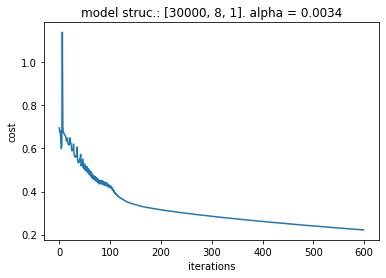

89 of 132 -------------------------------------------------- 2020-04-03 00:50:18.463706
Iteration 0 : Cost: 0.7107, Train Acc.: 50.0%
Iteration 250 : Cost: 0.5009, Train Acc.: 87.8205%
Iteration 500 : Cost: 0.4452, Train Acc.: 91.3462%
Train Accuracy: 89.5833%
Test Accuracy: 83.9744%


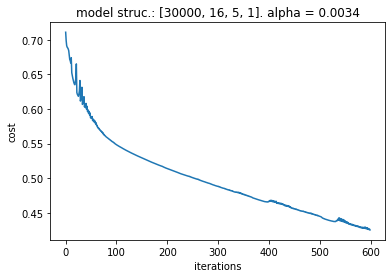

90 of 132 -------------------------------------------------- 2020-04-03 00:50:53.012619
Iteration 0 : Cost: 0.6917, Train Acc.: 50.3205%
Iteration 250 : Cost: 0.3042, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.253, Train Acc.: 88.9423%
Train Accuracy: 91.0256%
Test Accuracy: 83.3333%


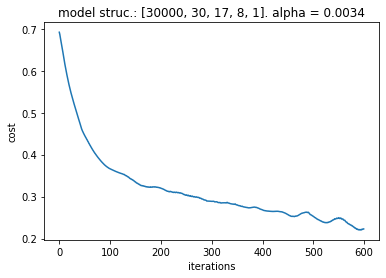

91 of 132 -------------------------------------------------- 2020-04-03 00:51:50.229614
Iteration 0 : Cost: 0.8184, Train Acc.: 49.5192%
Iteration 250 : Cost: 0.2915, Train Acc.: 88.141%
Iteration 500 : Cost: 0.2202, Train Acc.: 91.1859%
Train Accuracy: 92.7885%
Test Accuracy: 82.6923%


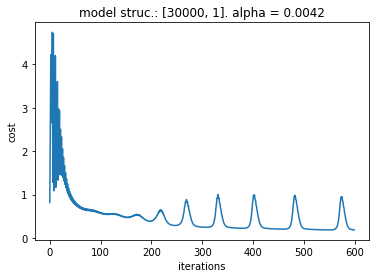

92 of 132 -------------------------------------------------- 2020-04-03 00:51:59.323336
Iteration 0 : Cost: 0.8179, Train Acc.: 50.0%
Iteration 250 : Cost: 0.6919, Train Acc.: 50.8013%
Iteration 500 : Cost: 0.6908, Train Acc.: 50.4808%
Train Accuracy: 49.0385%
Test Accuracy: 54.4872%


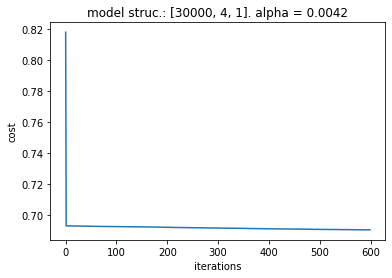

93 of 132 -------------------------------------------------- 2020-04-03 00:52:14.490720
Iteration 0 : Cost: 1.2204, Train Acc.: 50.4808%
Iteration 250 : Cost: 0.5012, Train Acc.: 80.4487%
Iteration 500 : Cost: 0.4298, Train Acc.: 87.6603%
Train Accuracy: 88.9423%
Test Accuracy: 85.2564%


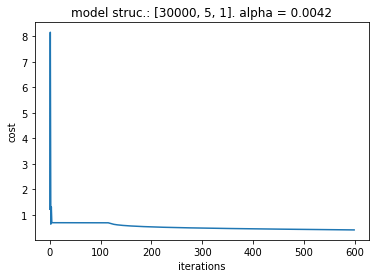

94 of 132 -------------------------------------------------- 2020-04-03 00:52:32.835090
Iteration 0 : Cost: 0.7518, Train Acc.: 49.8397%
Iteration 250 : Cost: 0.3289, Train Acc.: 86.6987%
Iteration 500 : Cost: 0.2592, Train Acc.: 90.3846%
Train Accuracy: 90.5449%
Test Accuracy: 84.6154%


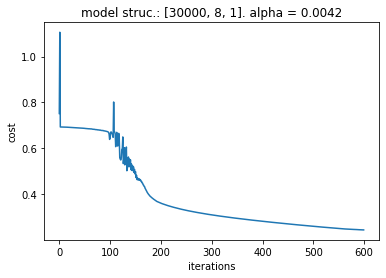

95 of 132 -------------------------------------------------- 2020-04-03 00:52:55.838034
Iteration 0 : Cost: 0.7418, Train Acc.: 48.0769%
Iteration 250 : Cost: 0.3363, Train Acc.: 86.6987%
Iteration 500 : Cost: 0.2639, Train Acc.: 90.2244%
Train Accuracy: 90.5449%
Test Accuracy: 83.9744%


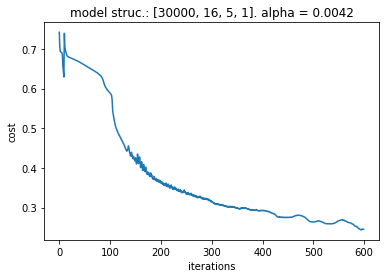

96 of 132 -------------------------------------------------- 2020-04-03 00:53:30.869599
Iteration 0 : Cost: 0.7826, Train Acc.: 50.0%
Iteration 250 : Cost: 0.2842, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.1701, Train Acc.: 92.1474%
Train Accuracy: 92.7885%
Test Accuracy: 83.3333%


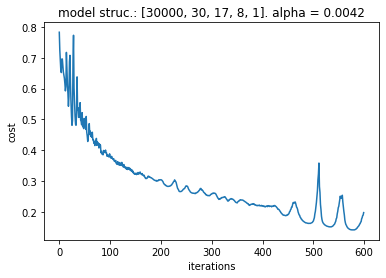

97 of 132 -------------------------------------------------- 2020-04-03 00:54:25.555133
Iteration 0 : Cost: 0.8303, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.3019, Train Acc.: 88.9423%
Iteration 500 : Cost: 0.1943, Train Acc.: 92.4679%
Train Accuracy: 93.75%
Test Accuracy: 82.0513%


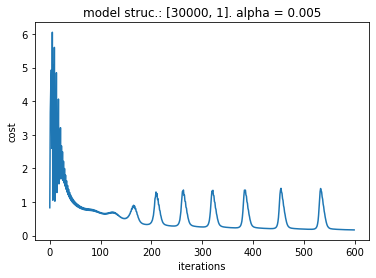

98 of 132 -------------------------------------------------- 2020-04-03 00:54:34.544684
Iteration 0 : Cost: 0.909, Train Acc.: 50.0%
Iteration 250 : Cost: 0.4989, Train Acc.: 86.2179%
Iteration 500 : Cost: 0.4388, Train Acc.: 90.2244%
Train Accuracy: 89.2628%
Test Accuracy: 82.0513%


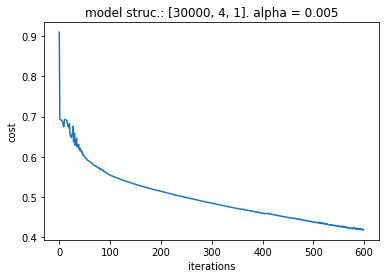

99 of 132 -------------------------------------------------- 2020-04-03 00:54:49.835025
Iteration 0 : Cost: 0.6906, Train Acc.: 50.0%
Iteration 250 : Cost: 0.4462, Train Acc.: 86.859%
Iteration 500 : Cost: 0.3871, Train Acc.: 89.9038%
Train Accuracy: 91.0256%
Test Accuracy: 81.4103%


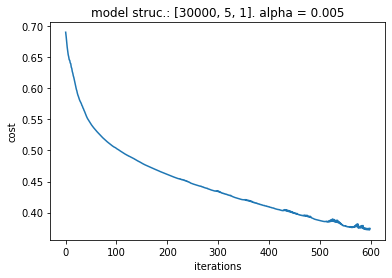

100 of 132 -------------------------------------------------- 2020-04-03 00:55:08.432587
Iteration 0 : Cost: 0.7, Train Acc.: 55.7692%
Iteration 250 : Cost: 0.2952, Train Acc.: 88.141%
Iteration 500 : Cost: 0.2469, Train Acc.: 90.0641%
Train Accuracy: 90.5449%
Test Accuracy: 84.6154%


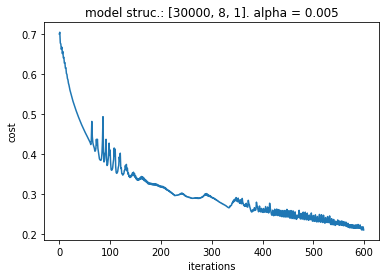

101 of 132 -------------------------------------------------- 2020-04-03 00:55:31.544056
Iteration 0 : Cost: 0.7099, Train Acc.: 45.8333%
Iteration 250 : Cost: 0.2902, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.2623, Train Acc.: 89.4231%
Train Accuracy: 92.4679%
Test Accuracy: 85.2564%


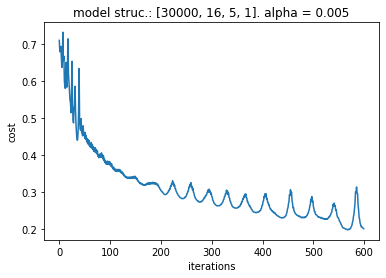

102 of 132 -------------------------------------------------- 2020-04-03 00:56:06.312956
Iteration 0 : Cost: 0.7264, Train Acc.: 49.8397%
Iteration 250 : Cost: 0.2803, Train Acc.: 88.141%
Iteration 500 : Cost: 0.1971, Train Acc.: 91.5064%
Train Accuracy: 93.5897%
Test Accuracy: 85.8974%


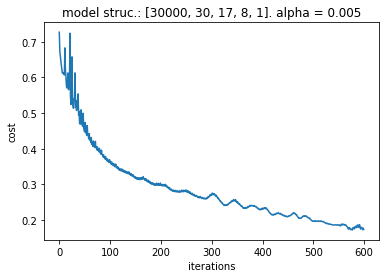

103 of 132 -------------------------------------------------- 2020-04-03 00:57:00.801333
Iteration 0 : Cost: 0.7099, Train Acc.: 51.6026%
Iteration 250 : Cost: 0.3442, Train Acc.: 88.4615%
Iteration 500 : Cost: 0.1941, Train Acc.: 92.9487%
Train Accuracy: 62.6603%
Test Accuracy: 75.0%


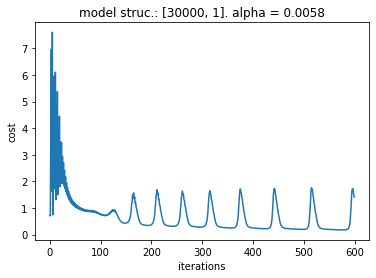

104 of 132 -------------------------------------------------- 2020-04-03 00:57:09.683073
Iteration 0 : Cost: 1.0134, Train Acc.: 50.3205%
Iteration 250 : Cost: 0.4443, Train Acc.: 87.1795%
Iteration 500 : Cost: 0.3795, Train Acc.: 91.9872%
Train Accuracy: 91.0256%
Test Accuracy: 85.8974%


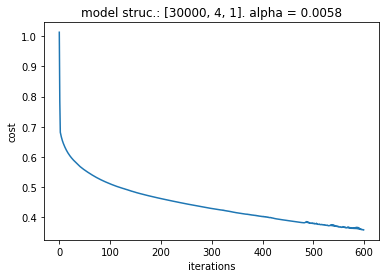

105 of 132 -------------------------------------------------- 2020-04-03 00:57:24.913959
Iteration 0 : Cost: 0.7237, Train Acc.: 50.4808%
Iteration 250 : Cost: 0.4047, Train Acc.: 86.6987%
Iteration 500 : Cost: 0.2828, Train Acc.: 88.7821%
Train Accuracy: 89.5833%
Test Accuracy: 83.3333%


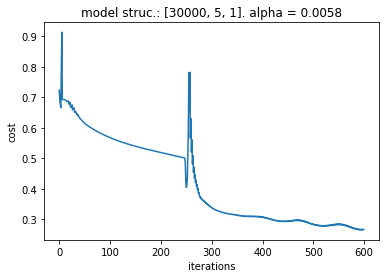

106 of 132 -------------------------------------------------- 2020-04-03 00:57:43.573477
Iteration 0 : Cost: 0.7272, Train Acc.: 47.9167%
Iteration 250 : Cost: 0.3044, Train Acc.: 87.6603%
Iteration 500 : Cost: 0.291, Train Acc.: 87.6603%
Train Accuracy: 90.7051%
Test Accuracy: 84.6154%


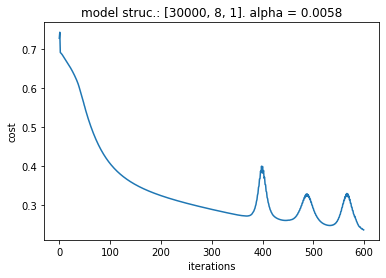

107 of 132 -------------------------------------------------- 2020-04-03 00:58:06.493232
Iteration 0 : Cost: 0.7047, Train Acc.: 50.4808%
Iteration 250 : Cost: 0.4265, Train Acc.: 87.3397%
Iteration 500 : Cost: 0.372, Train Acc.: 87.9808%
Train Accuracy: 90.3846%
Test Accuracy: 80.7692%


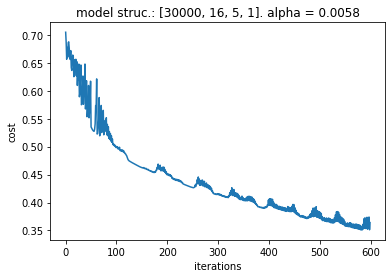

108 of 132 -------------------------------------------------- 2020-04-03 00:58:41.008201
Iteration 0 : Cost: 0.8667, Train Acc.: 49.359%
Iteration 250 : Cost: 0.3068, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.2153, Train Acc.: 90.8654%
Train Accuracy: 94.7115%
Test Accuracy: 87.1795%


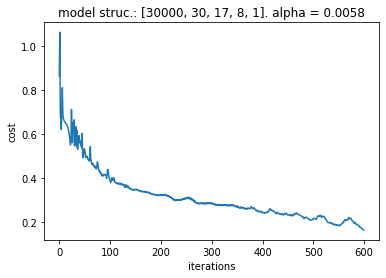

109 of 132 -------------------------------------------------- 2020-04-03 00:59:35.591308
Iteration 0 : Cost: 0.7231, Train Acc.: 44.7115%
Iteration 250 : Cost: 0.322, Train Acc.: 89.1026%
Iteration 500 : Cost: 0.1917, Train Acc.: 93.4295%
Train Accuracy: 57.0513%
Test Accuracy: 70.5128%


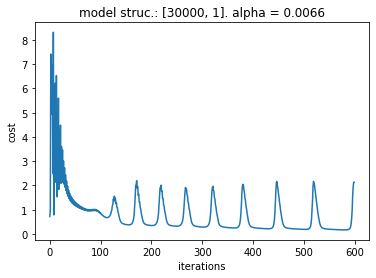

110 of 132 -------------------------------------------------- 2020-04-03 00:59:44.679361
Iteration 0 : Cost: 0.6718, Train Acc.: 52.7244%
Iteration 250 : Cost: 0.6931, Train Acc.: 50.3205%
Iteration 500 : Cost: 0.6931, Train Acc.: 50.4808%
Train Accuracy: 50.4808%
Test Accuracy: 55.1282%


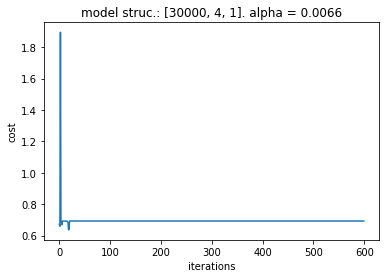

111 of 132 -------------------------------------------------- 2020-04-03 00:59:59.693576
Iteration 0 : Cost: 0.7195, Train Acc.: 47.9167%
Iteration 250 : Cost: 0.4321, Train Acc.: 86.2179%
Iteration 500 : Cost: 0.3687, Train Acc.: 88.141%
Train Accuracy: 92.9487%
Test Accuracy: 82.0513%


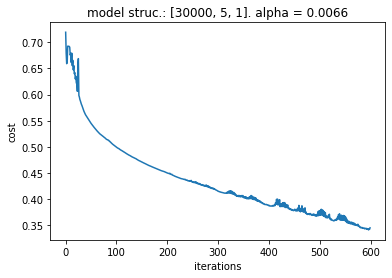

112 of 132 -------------------------------------------------- 2020-04-03 01:00:19.157025
Iteration 0 : Cost: 0.7092, Train Acc.: 48.0769%
Iteration 250 : Cost: 0.285, Train Acc.: 88.4615%
Iteration 500 : Cost: 0.2314, Train Acc.: 90.3846%
Train Accuracy: 91.3462%
Test Accuracy: 83.3333%


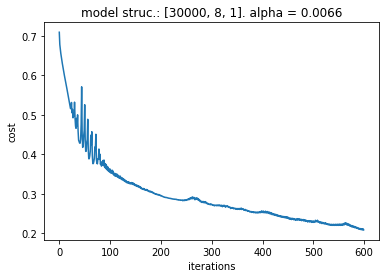

113 of 132 -------------------------------------------------- 2020-04-03 01:00:42.385523
Iteration 0 : Cost: 0.7246, Train Acc.: 51.6026%
Iteration 250 : Cost: 0.429, Train Acc.: 86.5385%
Iteration 500 : Cost: 0.3537, Train Acc.: 90.5449%
Train Accuracy: 92.9487%
Test Accuracy: 82.6923%


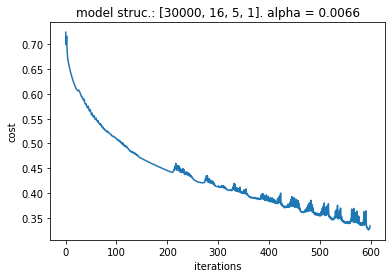

114 of 132 -------------------------------------------------- 2020-04-03 01:01:17.254597
Iteration 0 : Cost: 0.6813, Train Acc.: 53.3654%
Iteration 250 : Cost: 0.3403, Train Acc.: 86.5385%
Iteration 500 : Cost: 0.2606, Train Acc.: 89.1026%
Train Accuracy: 90.7051%
Test Accuracy: 84.6154%


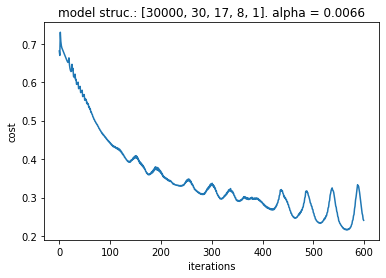

115 of 132 -------------------------------------------------- 2020-04-03 01:02:11.559483
Iteration 0 : Cost: 0.7982, Train Acc.: 42.7885%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:303: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = - np.sum(np.add(np.dot(Y, np.log(A['A' + str(L)].T)), np.dot(1 - Y, np.log(1 - A['A' + str(L)].T)))) / m # calculates the cross entropy (first part of the cost).
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:321: RuntimeWarning: invalid value encountered in true_divide
  dA['dA' + str(L)] = - (np.divide(Y, A['A' + str(L)]) - np.divide(1 - Y, 1 - A['A' + str(L)])) # initializing backward propagation.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:314: RuntimeWarning: invalid value encountered in greater
  Yhat_train = np.array((Yhat_train > 0.5) * 1).reshape(1, m) # converting to 0s and 1s based on 0.5 threshold.


Iteration 250 : Cost: nan, Train Acc.: 50.0%
Iteration 500 : Cost: nan, Train Acc.: 50.0%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:354: RuntimeWarning: invalid value encountered in greater
  Yhat_test = np.array((Yhat_test > 0.5) * 1).reshape(1, m_test) # converting to 0s and 1s based on 0.5 threshold.


Train Accuracy: 50.0%
Test Accuracy: 43.5897%


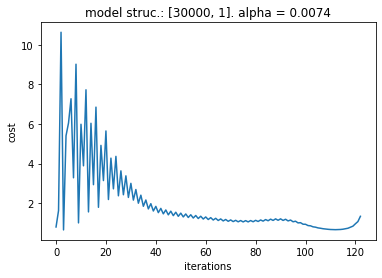

116 of 132 -------------------------------------------------- 2020-04-03 01:02:20.802526
Iteration 0 : Cost: 0.6935, Train Acc.: 50.3205%
Iteration 250 : Cost: 0.6929, Train Acc.: 50.1603%
Iteration 500 : Cost: 0.6922, Train Acc.: 50.1603%
Train Accuracy: 84.9359%
Test Accuracy: 81.4103%


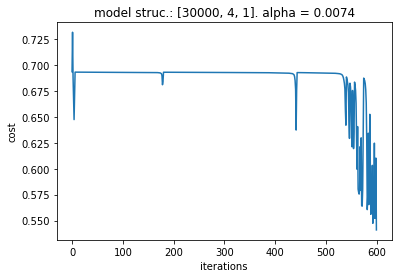

117 of 132 -------------------------------------------------- 2020-04-03 01:02:36.077154
Iteration 0 : Cost: 1.1386, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.6923, Train Acc.: 50.0%
Iteration 500 : Cost: 0.6922, Train Acc.: 50.3205%
Train Accuracy: 50.3205%
Test Accuracy: 56.4103%


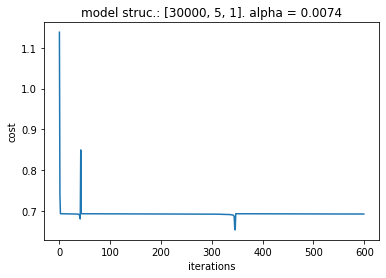

118 of 132 -------------------------------------------------- 2020-04-03 01:02:54.586358
Iteration 0 : Cost: 0.6798, Train Acc.: 56.7308%
Iteration 250 : Cost: 0.4213, Train Acc.: 89.4231%
Iteration 500 : Cost: 0.349, Train Acc.: 90.8654%
Train Accuracy: 92.4679%
Test Accuracy: 82.0513%


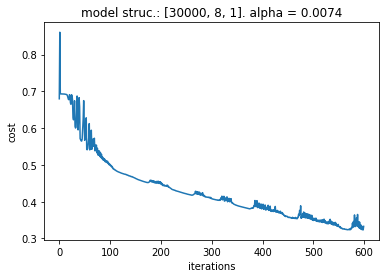

119 of 132 -------------------------------------------------- 2020-04-03 01:03:17.491599
Iteration 0 : Cost: 0.8286, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.4954, Train Acc.: 86.3782%
Iteration 500 : Cost: 0.4204, Train Acc.: 90.5449%
Train Accuracy: 89.5833%
Test Accuracy: 83.9744%


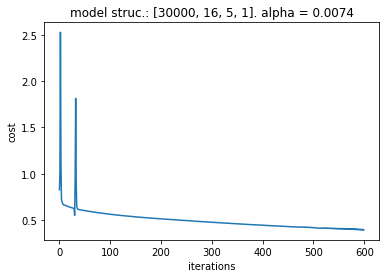

120 of 132 -------------------------------------------------- 2020-04-03 01:03:52.032313
Iteration 0 : Cost: 0.6963, Train Acc.: 51.9231%
Iteration 250 : Cost: 0.287, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.1811, Train Acc.: 92.1474%
Train Accuracy: 94.391%
Test Accuracy: 86.5385%


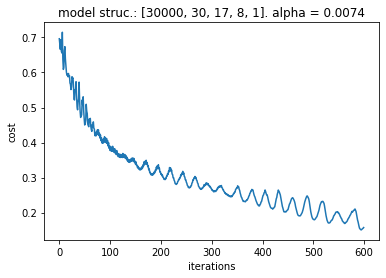

121 of 132 -------------------------------------------------- 2020-04-03 01:04:46.899221
Iteration 0 : Cost: 0.8393, Train Acc.: 49.1987%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:303: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = - np.sum(np.add(np.dot(Y, np.log(A['A' + str(L)].T)), np.dot(1 - Y, np.log(1 - A['A' + str(L)].T)))) / m # calculates the cross entropy (first part of the cost).
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:321: RuntimeWarning: invalid value encountered in true_divide
  dA['dA' + str(L)] = - (np.divide(Y, A['A' + str(L)]) - np.divide(1 - Y, 1 - A['A' + str(L)])) # initializing backward propagation.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:314: RuntimeWarning: invalid value encountered in greater
  Yhat_train = np.array((Yhat_train > 0.5) * 1).reshape(1, m) # converting to 0s and 1s based on 0.5 threshold.


Iteration 250 : Cost: nan, Train Acc.: 50.0%
Iteration 500 : Cost: nan, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:354: RuntimeWarning: invalid value encountered in greater
  Yhat_test = np.array((Yhat_test > 0.5) * 1).reshape(1, m_test) # converting to 0s and 1s based on 0.5 threshold.


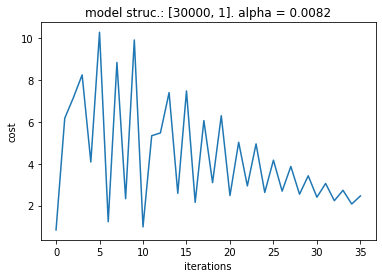

122 of 132 -------------------------------------------------- 2020-04-03 01:04:55.954979
Iteration 0 : Cost: 0.7179, Train Acc.: 42.7885%
Iteration 250 : Cost: 0.6931, Train Acc.: 50.0%
Iteration 500 : Cost: 0.6931, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


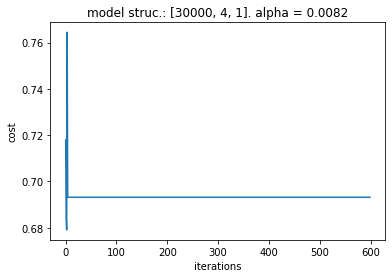

123 of 132 -------------------------------------------------- 2020-04-03 01:05:10.795631
Iteration 0 : Cost: 0.8274, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.6931, Train Acc.: 50.0%
Iteration 500 : Cost: 0.6931, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 56.4103%


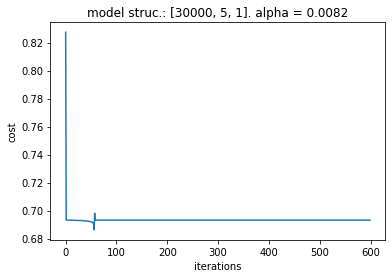

124 of 132 -------------------------------------------------- 2020-04-03 01:05:29.217233
Iteration 0 : Cost: 0.7163, Train Acc.: 45.9936%
Iteration 250 : Cost: 0.3001, Train Acc.: 88.141%
Iteration 500 : Cost: 0.2454, Train Acc.: 90.0641%
Train Accuracy: 91.9872%
Test Accuracy: 83.9744%


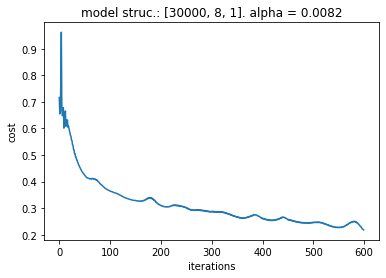

125 of 132 -------------------------------------------------- 2020-04-03 01:05:52.687123
Iteration 0 : Cost: 0.7027, Train Acc.: 51.4423%
Iteration 250 : Cost: 0.3104, Train Acc.: 87.6603%
Iteration 500 : Cost: 0.2306, Train Acc.: 91.1859%
Train Accuracy: 87.6603%
Test Accuracy: 76.9231%


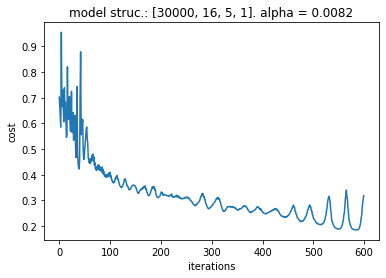

126 of 132 -------------------------------------------------- 2020-04-03 01:06:27.626509
Iteration 0 : Cost: 0.758, Train Acc.: 42.4679%
Iteration 250 : Cost: 0.3016, Train Acc.: 87.6603%
Iteration 500 : Cost: 0.2181, Train Acc.: 91.1859%
Train Accuracy: 90.3846%
Test Accuracy: 83.9744%


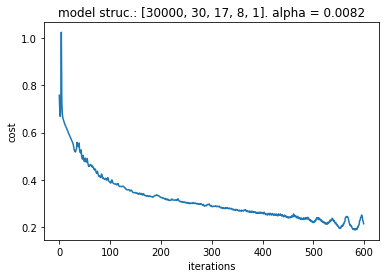

127 of 132 -------------------------------------------------- 2020-04-03 01:07:29.626881
Iteration 0 : Cost: 0.7384, Train Acc.: 43.109%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:303: RuntimeWarning: divide by zero encountered in log
  cross_entropy_cost = - np.sum(np.add(np.dot(Y, np.log(A['A' + str(L)].T)), np.dot(1 - Y, np.log(1 - A['A' + str(L)].T)))) / m # calculates the cross entropy (first part of the cost).
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:321: RuntimeWarning: divide by zero encountered in true_divide
  dA['dA' + str(L)] = - (np.divide(Y, A['A' + str(L)]) - np.divide(1 - Y, 1 - A['A' + str(L)])) # initializing backward propagation.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:321: RuntimeWarning: invalid value encountered in true_divide
  dA['dA' + str(L)] = - (np.divide(Y, A['A' + str(L)]) - np.divide(1 - Y, 1 - A['A' + str(L)])) # initializing backward propagation.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:322: RuntimeWarning: invalid value encountered in multiply
  dZ['dZ' 

Iteration 250 : Cost: nan, Train Acc.: 50.0%
Iteration 500 : Cost: nan, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:354: RuntimeWarning: invalid value encountered in greater
  Yhat_test = np.array((Yhat_test > 0.5) * 1).reshape(1, m_test) # converting to 0s and 1s based on 0.5 threshold.


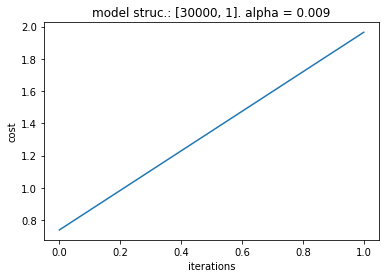

128 of 132 -------------------------------------------------- 2020-04-03 01:07:38.872076
Iteration 0 : Cost: 0.7412, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.3209, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.2887, Train Acc.: 88.4615%
Train Accuracy: 89.4231%
Test Accuracy: 83.3333%


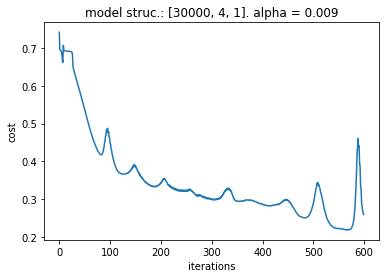

129 of 132 -------------------------------------------------- 2020-04-03 01:07:53.864310
Iteration 0 : Cost: 0.7274, Train Acc.: 42.3077%
Iteration 250 : Cost: 0.6931, Train Acc.: 50.0%
Iteration 500 : Cost: 0.6931, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


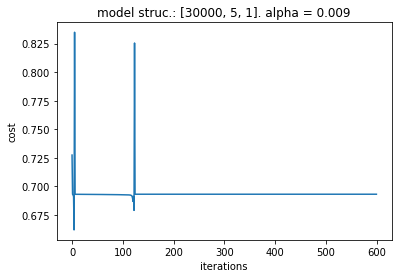

130 of 132 -------------------------------------------------- 2020-04-03 01:08:12.393609
Iteration 0 : Cost: 0.7025, Train Acc.: 46.9551%
Iteration 250 : Cost: 0.3106, Train Acc.: 86.859%
Iteration 500 : Cost: 0.2435, Train Acc.: 90.2244%
Train Accuracy: 90.5449%
Test Accuracy: 85.2564%


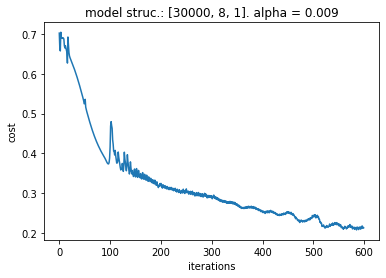

131 of 132 -------------------------------------------------- 2020-04-03 01:08:35.436279
Iteration 0 : Cost: 0.7075, Train Acc.: 50.641%
Iteration 250 : Cost: 0.4119, Train Acc.: 88.3013%
Iteration 500 : Cost: 0.3451, Train Acc.: 88.9423%
Train Accuracy: 89.9038%
Test Accuracy: 80.7692%


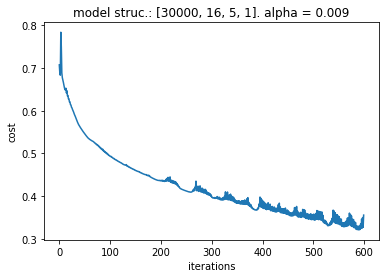

132 of 132 -------------------------------------------------- 2020-04-03 01:09:09.940489
Iteration 0 : Cost: 0.7857, Train Acc.: 50.1603%
Iteration 250 : Cost: 0.2918, Train Acc.: 87.9808%
Iteration 500 : Cost: 0.2023, Train Acc.: 92.6282%
Train Accuracy: 89.1026%
Test Accuracy: 80.1282%


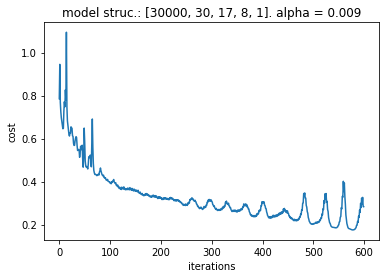

In [10]:
# Setting up the experiment, for details on the 'deep_nn_model_exp' function, refer to the nn_toolkit repo.
exp_model_list = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[1], [4, 1], [5, 1], [8, 1], [16, 5, 1], [30, 17, 8, 1]],
                                   epochs_range = (300, 600), epochs_sets = 2, alpha_range = (0.001, 0.009), alpha_sets = 11,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 250, show_plots = True)

## 7. The resulting models are examined and the top performing ones are trained over longer epochs to analyse their test accuracies.

### Tabularizing the resulted models for examination

In [11]:
# Tabularizing the resulted models using the 'models_summary' function for better examination.
models_df, top_model_index = models_summary(exp_model_list) # using the models_summary function to transform the models list into a pandas data frame.
models_df.sort_values(['Test Accuracy', 'Train Accuracy'], ascending = False).head(10) # sorting the models by test accuracy then train accuracy and getting the top 10.

Top models, based on Test then Train accuracies: [34]


,Model No.,Model Structure,Training Minutes,Number of Parameters,Train X Shape,Train Y Sahpe,Test X Shape,Test Y Sahpe,Iterations,alpha,P,Costs,Train Accuracy,Test Accuracy,Dropout Masks,Regularization Lambd,Keep Prob.,Dropout Layers
34,2020-04-03 00:34:24.922629,"(30000, 16, 5, 1)",0:00:17.537854,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",300,0.0050,"{'W1': [[-0.0013933110392513057, 0.00854248071...","[0.6986883645232682, 0.6801246174571901, 0.668...",88.7821,88.4615,{},0.0,1.0,()
107,2020-04-03 00:59:35.580102,"(30000, 30, 17, 8, 1)",0:00:54.411620,8,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",600,0.0058,"{'W1': [[0.00626790015259146, -0.0014918517611...","[0.8666672566514783, 1.0641769518760045, 0.690...",94.7115,87.1795,{},0.0,1.0,()
66,2020-04-03 00:41:37.039425,"(30000, 1)",0:00:09.105200,2,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",600,0.0010,"{'W1': [[-0.00588349821164682, -0.015962420335...","[0.7908287714371875, 0.7603539236858541, 0.731...",89.5833,87.1795,{},0.0,1.0,()
3,2020-04-03 00:27:17.860598,"(30000, 8, 1)",0:00:11.363602,4,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",300,0.0010,"{'W1': [[-0.008388513847099962, -0.00353361084...","[0.6807427464114778, 0.666409591706721, 0.6597...",89.4231,87.1795,{},0.0,1.0,()
46,2020-04-03 00:37:02.017839,"(30000, 16, 5, 1)",0:00:17.486957,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",300,0.0066,"{'W1': [[0.0026692068701044897, -0.01260140071...","[0.8019627621230886, 0.8592524310378699, 0.707...",87.8205,87.1795,{},0.0,1.0,()
119,2020-04-03 01:04:46.883284,"(30000, 30, 17, 8, 1)",0:00:54.710375,8,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",600,0.0074,"{'W1': [[0.003951601869131622, -0.011213128758...","[0.6963113918005427, 0.681800084812331, 0.6660...",94.3910,86.5385,{},0.0,1.0,()
76,2020-04-03 00:45:44.068286,"(30000, 16, 5, 1)",0:00:34.791674,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",600,0.0018,"{'W1': [[0.0058767614713326815, 0.002753307644...","[0.6827232776657468, 0.6770653570415257, 0.666...",93.2692,86.5385,{},0.0,1.0,()
11,2020-04-03 00:29:29.610730,"(30000, 30, 17, 8, 1)",0:00:30.046459,8,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",300,0.0018,"{'W1': [[-0.0022110002308681747, 0.00167342871...","[0.695379090701955, 0.6642530585794225, 0.6430...",90.5449,86.5385,{},0.0,1.0,()
50,2020-04-03 00:37:55.003903,"(30000, 5, 1)",0:00:08.964978,4,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",300,0.0074,"{'W1': [[0.012009869294713742, 0.0127426962126...","[0.7307754396580527, 1.7200577528776755, 0.761...",87.8205,86.5385,{},0.0,1.0,()
59,2020-04-03 00:40:09.422974,"(30000, 30, 17, 8, 1)",0:00:26.980011,8,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",300,0.0082,"{'W1': [[0.001728679489206683, 0.0012798434945...","[1.042769751040079, 1.3075126001422743, 0.8094...",87.0192,86.5385,{},0.0,1.0,()


We can see that the top performing model is at index 34. However, further analysis is needed to examine the effects of longer epochs over different alphas on the costs and accuracies.
This is needed since the variant of model 34, the one with the same structure and alpha but over 600 epochs, is not within the top 10 shown in the tabel above, which may indicate the instability of this model.
Robust models should generaly benefit from longer training times, though not always. In this application however, the task is to come up with such robust models as they more consistently 
display expected behaviours.
 

In [110]:
pd.set_option('display.max_columns', None) # to show all the columns of the dataframes preduced.
pd.set_option('display.max_rows', 10) # to show only 10 rows of the dataframes preduced.

In order to continue the analysis, will add two more columns to the models dataframe, mean and statandard deviation as follows:

In [95]:
# Calculating the mean and standard deviation of the cost for every model and adding it as a new column
models_df['Avg Cost'] = models_df['Costs'].apply(lambda cost_list: np.mean(cost_list))
models_df['Std Cost'] = models_df['Costs'].apply(lambda cost_list: np.std(cost_list))
models_df.head(1)

,Model No.,Model Structure,Training Minutes,Number of Parameters,Train X Shape,Train Y Sahpe,Test X Shape,Test Y Sahpe,Iterations,alpha,P,Costs,Train Accuracy,Test Accuracy,Dropout Masks,Regularization Lambd,Keep Prob.,Dropout Layers,Avg Cost,Std Cost
0,2020-04-03 00:26:49.320067,"(30000, 1)",0:00:04.534916,2,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",300,0.001,"{'W1': [[0.008096773514029305, 0.0034133294443...","[0.8398832694397864, 0.7573094982540914, 0.727...",87.5,83.9744,{},0.0,1.0,(),0.386068,0.08148


### Summarizing the data by pivoting
Now that we have included the needed columns, we're ready to produce summaries to draw insights on the best models.

In [112]:
models_df_pivot1 = models_df.pivot_table(values = ['Test Accuracy', 'Train Accuracy', 'Avg Cost', 'Std Cost'], index = ['Model Structure', 'alpha'], columns = 'Iterations')
models_df_pivot1

Avg Cost            Std Cost            \
Iterations                         300       600       300       600   
Model Structure       alpha                                            
(30000, 1)            0.0010  0.386068  0.339921  0.081480  0.072703   
                      0.0018  0.393262  0.329608  0.206937  0.158318   
                      0.0026  0.464686  0.344110  0.374294  0.290064   
                      0.0034  0.585945  0.432494  0.525800  0.408191   
                      0.0042  0.716259  0.533323  0.684761  0.552125   
...                                ...       ...       ...       ...   
(30000, 30, 17, 8, 1) 0.0058  0.403012  0.316288  0.112425  0.119682   
                      0.0066  0.410772  0.355295  0.334794  0.109385   
                      0.0074  0.396189  0.300398  0.159788  0.110358   
                      0.0082  0.533618  0.317379  0.093767  0.106168   
                      0.0090  0.382465  0.327700  0.101190  0.123259   

                             Test Accuracy          Train Accuracy           
Iterations                             300      600            300      600  
Model Structure       alpha                                                  
(30000, 1)            0.0010       83.9744  87.1795        87.5000  89.5833  
                      0.0018       84.6154  83.9744        88.9423  91.6667  
                      0.0026       84.6154  83.9744        89.4231  92.4679  
                      0.0034       83.9744  83.3333        86.5385  91.3462  
                      0.0042       83.3333  82.6923        91.0256  92.7885  
...                                    ...      ...            ...      ...  
(30000, 30, 17, 8, 1) 0.0058       83.3333  87.1795        87.9808  94.7115  
                      0.0066       79.4872  84.6154        87.1795  90.7051  
                      0.0074       85.2564  86.5385        90.5449  94.3910  
                      0.0082       86.5385  83.9744        87.0192  90.3846  
                      0.0090       83.9744  80.1282        88.3013  89.1026  

[66 rows x 8 columns]

### Creating 4 new columns in the pivot dataframe to analyse whither or not:
1. Test and train accuracies increase over increased number of epochs.
2. Average cost decrease over increased number of epochs.
3. Standard deviation decrease over increased number of epochs.

The above 3 criteria comprise a very loose proxy for model stability. However, I have found them to be sufficient in narrowing the search space in an effective manner.

In [113]:
# Creating criteria 1 for test accuracy.
models_df_pivot1['test_acc_imp'] = models_df_pivot1['Test Accuracy'][600] - models_df_pivot1['Test Accuracy'][300] # the '_imp' suffix abbreviates 'improvement'.

# Creating criteria 1 for train accuracy.
models_df_pivot1['train_acc_imp'] = models_df_pivot1['Train Accuracy'][600] - models_df_pivot1['Train Accuracy'][300]

# Creating criteria 2.
models_df_pivot1['avg_cost_imp'] = models_df_pivot1['Avg Cost'][300] - models_df_pivot1['Avg Cost'][600]

# Creating criteria 3.
models_df_pivot1['std_imp'] = models_df_pivot1['Std Cost'][300] - models_df_pivot1['Std Cost'][600]
models_df_pivot1

Avg Cost            Std Cost            \
Iterations                         300       600       300       600   
Model Structure       alpha                                            
(30000, 1)            0.0010  0.386068  0.339921  0.081480  0.072703   
                      0.0018  0.393262  0.329608  0.206937  0.158318   
                      0.0026  0.464686  0.344110  0.374294  0.290064   
                      0.0034  0.585945  0.432494  0.525800  0.408191   
                      0.0042  0.716259  0.533323  0.684761  0.552125   
...                                ...       ...       ...       ...   
(30000, 30, 17, 8, 1) 0.0058  0.403012  0.316288  0.112425  0.119682   
                      0.0066  0.410772  0.355295  0.334794  0.109385   
                      0.0074  0.396189  0.300398  0.159788  0.110358   
                      0.0082  0.533618  0.317379  0.093767  0.106168   
                      0.0090  0.382465  0.327700  0.101190  0.123259   

                             Test Accuracy          Train Accuracy           \
Iterations                             300      600            300      600   
Model Structure       alpha                                                   
(30000, 1)            0.0010       83.9744  87.1795        87.5000  89.5833   
                      0.0018       84.6154  83.9744        88.9423  91.6667   
                      0.0026       84.6154  83.9744        89.4231  92.4679   
                      0.0034       83.9744  83.3333        86.5385  91.3462   
                      0.0042       83.3333  82.6923        91.0256  92.7885   
...                                    ...      ...            ...      ...   
(30000, 30, 17, 8, 1) 0.0058       83.3333  87.1795        87.9808  94.7115   
                      0.0066       79.4872  84.6154        87.1795  90.7051   
                      0.0074       85.2564  86.5385        90.5449  94.3910   
                      0.0082       86.5385  83.9744        87.0192  90.3846   
                      0.0090       83.9744  80.1282        88.3013  89.1026   

                             test_acc_imp train_acc_imp avg_cost_imp   std_imp  
Iterations                                                                      
Model Structure       alpha                                                     
(30000, 1)            0.0010       3.2051        2.0833     0.046147  0.008777  
                      0.0018      -0.6410        2.7244     0.063653  0.048619  
                      0.0026      -0.6410        3.0448     0.120577  0.084230  
                      0.0034      -0.6411        4.8077     0.153452  0.117608  
                      0.0042      -0.6410        1.7629     0.182935  0.132636  
...                                   ...           ...          ...       ...  
(30000, 30, 17, 8, 1) 0.0058       3.8462        6.7307     0.086723 -0.007257  
                      0.0066       5.1282        3.5256     0.055477  0.225409  
                      0.0074       1.2821        3.8461     0.095790  0.049430  
                      0.0082      -2.5641        3.3654     0.216239 -0.012401  
                      0.0090      -3.8462        0.8013     0.054765 -0.022070  

[66 rows x 12 columns]

### Summarizing over the above criteria by filltering the pivot data frame as follows:

In [114]:
models_df_pivot1[(models_df_pivot1['avg_cost_imp'] > 0) & (models_df_pivot1['std_imp'] > 0) & (models_df_pivot1['test_acc_imp'] > 0)].sort_values(by = ['test_acc_imp', 'train_acc_imp', 'avg_cost_imp', 'std_imp'], ascending = False)

Avg Cost            Std Cost            \
Iterations                         300       600       300       600   
Model Structure       alpha                                            
(30000, 4, 1)         0.0090  0.725402  0.348685  0.558709  0.109689   
(30000, 30, 17, 8, 1) 0.0066  0.410772  0.355295  0.334794  0.109385   
(30000, 1)            0.0010  0.386068  0.339921  0.081480  0.072703   
(30000, 8, 1)         0.0082  0.618617  0.313222  0.366751  0.092897   
(30000, 16, 5, 1)     0.0018  0.357144  0.296671  0.097846  0.093890   
(30000, 30, 17, 8, 1) 0.0074  0.396189  0.300398  0.159788  0.110358   
(30000, 16, 5, 1)     0.0026  0.356322  0.309390  0.105677  0.093819   

                             Test Accuracy          Train Accuracy           \
Iterations                             300      600            300      600   
Model Structure       alpha                                                   
(30000, 4, 1)         0.0090       55.7692  83.3333        50.3205  89.4231   
(30000, 30, 17, 8, 1) 0.0066       79.4872  84.6154        87.1795  90.7051   
(30000, 1)            0.0010       83.9744  87.1795        87.5000  89.5833   
(30000, 8, 1)         0.0082       82.0513  83.9744        86.3782  91.9872   
(30000, 16, 5, 1)     0.0018       84.6154  86.5385        90.5449  93.2692   
(30000, 30, 17, 8, 1) 0.0074       85.2564  86.5385        90.5449  94.3910   
(30000, 16, 5, 1)     0.0026       84.6154  85.2564        91.0256  92.6282   

                             test_acc_imp train_acc_imp avg_cost_imp   std_imp  
Iterations                                                                      
Model Structure       alpha                                                     
(30000, 4, 1)         0.0090      27.5641       39.1026     0.376717  0.449019  
(30000, 30, 17, 8, 1) 0.0066       5.1282        3.5256     0.055477  0.225409  
(30000, 1)            0.0010       3.2051        2.0833     0.046147  0.008777  
(30000, 8, 1)         0.0082       1.9231        5.6090     0.305395  0.273854  
(30000, 16, 5, 1)     0.0018       1.9231        2.7243     0.060473  0.003956  
(30000, 30, 17, 8, 1) 0.0074       1.2821        3.8461     0.095790  0.049430  
(30000, 16, 5, 1)     0.0026       0.6410        1.6026     0.046932  0.011859

We can see that the intial top model, indexed 34 in the models_df, is no longer part of the fillterd models above. This is consistant with the first conclusion we had about the model being instable.
 

### Running an experiment for each of the above resulted models by training over 3000 epochs and observing test accuracy

1 of 1 -------------------------------------------------- 2020-04-03 12:26:15.927404
Iteration 0 : Cost: 0.6933, Train Acc.: 50.0%
Iteration 1000 : Cost: 0.2738, Train Acc.: 89.5833%
Iteration 2000 : Cost: 0.062, Train Acc.: 97.4359%
Train Accuracy: 98.2372%
Test Accuracy: 81.4103%


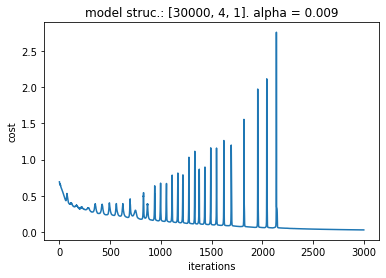

In [116]:
exp_model_list1 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[4, 1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.009, 0.009), alpha_sets = 1,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

1 of 1 -------------------------------------------------- 2020-04-03 12:27:28.861217
Iteration 0 : Cost: 0.8477, Train Acc.: 50.4808%
Iteration 1000 : Cost: 0.3143, Train Acc.: 86.3782%
Iteration 2000 : Cost: 0.0166, Train Acc.: 99.8397%
Train Accuracy: 100.0%
Test Accuracy: 82.0513%


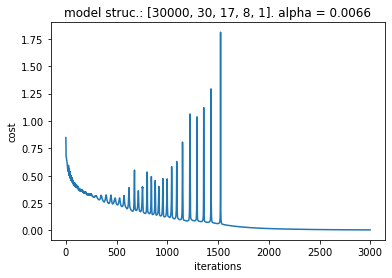

In [117]:
exp_model_list2 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[30, 17, 8, 1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.0066, 0.009), alpha_sets = 1,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

1 of 1 -------------------------------------------------- 2020-04-03 12:31:53.509354
Iteration 0 : Cost: 0.8399, Train Acc.: 50.0%
Iteration 1000 : Cost: 0.2497, Train Acc.: 91.8269%
Iteration 2000 : Cost: 0.2, Train Acc.: 93.109%
Train Accuracy: 95.0321%
Test Accuracy: 82.6923%


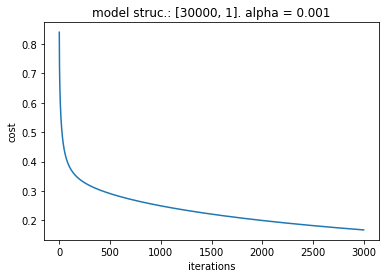

In [118]:
exp_model_list3 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.0010, 0.009), alpha_sets = 1,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

1 of 1 -------------------------------------------------- 2020-04-03 12:32:38.497835
Iteration 0 : Cost: 0.828, Train Acc.: 48.2372%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:320: RuntimeWarning: divide by zero encountered in log
  ## Backward Propagation:
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:338: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:339: RuntimeWarning: invalid value encountered in multiply
  end = datetime.now() # to measure training time (end).
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:331: RuntimeWarning: invalid value encountered in greater
  dZ['dZ' + str(l - 1)] = np.array(dA['dA' + str(l - 1)], copy=True) # to calculate dZ_l-1.
C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:349: RuntimeWarning: invalid value encountered in less_equal
  A_test['A' + str(l)] = np.maximum(0, Z['Z' + str(l)]) # calculate the activations as ReLU functions.


Iteration 1000 : Cost: nan, Train Acc.: 50.0%
Iteration 2000 : Cost: nan, Train Acc.: 50.0%
Train Accuracy: 50.0%
Test Accuracy: 43.5897%


C:\Users\alial\Desktop\DeepLearningProjects\Coursera\Course1\nn_toolkit.py:371: RuntimeWarning: invalid value encountered in greater
  'Training Minutes': str(end - start),


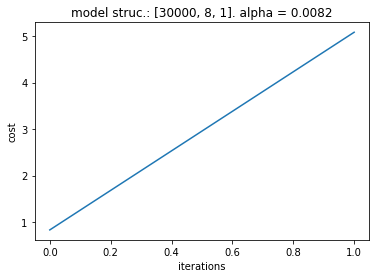

In [119]:
exp_model_list4 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[8, 1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.0082, 0.009), alpha_sets = 1,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

1 of 1 -------------------------------------------------- 2020-04-03 12:34:28.573919
Iteration 0 : Cost: 0.6974, Train Acc.: 50.641%
Iteration 1000 : Cost: 0.1179, Train Acc.: 97.7564%
Iteration 2000 : Cost: 0.0492, Train Acc.: 99.5192%
Train Accuracy: 99.8397%
Test Accuracy: 87.8205%


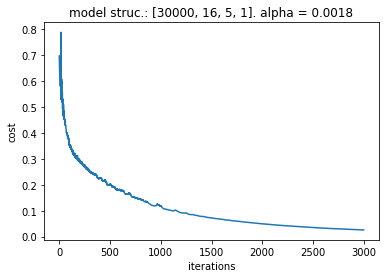

In [120]:
exp_model_list5 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[16, 5, 1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.0018, 0.009), alpha_sets = 1,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

1 of 1 -------------------------------------------------- 2020-04-03 12:37:13.564265
Iteration 0 : Cost: 0.8477, Train Acc.: 50.4808%
Iteration 1000 : Cost: 0.3265, Train Acc.: 85.0962%
Iteration 2000 : Cost: 0.0361, Train Acc.: 99.6795%
Train Accuracy: 100.0%
Test Accuracy: 82.0513%


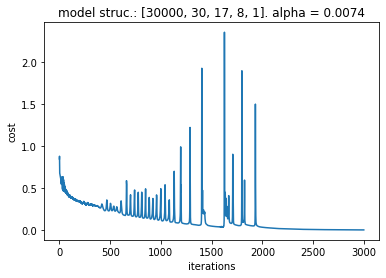

In [121]:
exp_model_list6 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[30, 17, 8, 1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.0074, 0.009), alpha_sets = 1,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

1 of 1 -------------------------------------------------- 2020-04-03 12:41:45.728180
Iteration 0 : Cost: 0.6974, Train Acc.: 50.641%
Iteration 1000 : Cost: 0.087, Train Acc.: 98.5577%
Iteration 2000 : Cost: 0.0298, Train Acc.: 99.8397%
Train Accuracy: 100.0%
Test Accuracy: 90.3846%


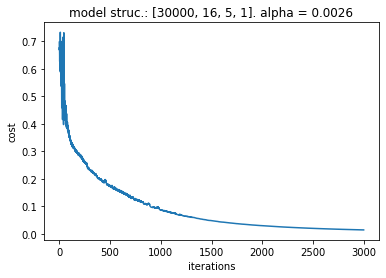

In [122]:
exp_model_list7 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[16, 5, 1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.0026, 0.009), alpha_sets = 1,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

### Combaining the the experiments resluts into one data frame to be analysed
Now that the 7 experiments are done, we'll combine the results and analyse them as follows:

In [140]:
filltered_models_df = pd.DataFrame() # setting the data frame
filltered_models_df = pd.concat([models_summary(exp_model_list1)[0], models_summary(exp_model_list2)[0],
                                models_summary(exp_model_list3)[0], models_summary(exp_model_list4)[0],
                                models_summary(exp_model_list5)[0], models_summary(exp_model_list6)[0],
                                models_summary(exp_model_list7)[0]], ignore_index = True, sort = False) # concatenating the models
filltered_models_df.sort_values(['Test Accuracy', 'Train Accuracy'], ascending = False) # sorting the models by test accuracy then train accuracy.

Top models, based on Test then Train accuracies: [0]
Top models, based on Test then Train accuracies: [0]
Top models, based on Test then Train accuracies: [0]
Top models, based on Test then Train accuracies: [0]
Top models, based on Test then Train accuracies: [0]
Top models, based on Test then Train accuracies: [0]
Top models, based on Test then Train accuracies: [0]


,Model No.,Model Structure,Training Minutes,Number of Parameters,Train X Shape,Train Y Sahpe,Test X Shape,Test Y Sahpe,Iterations,alpha,P,Costs,Train Accuracy,Test Accuracy,Dropout Masks,Regularization Lambd,Keep Prob.,Dropout Layers
6,2020-04-03 12:44:31.381806,"(30000, 16, 5, 1)",0:02:45.259826,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.0026,"{'W1': [[0.0060352545473341054, 0.002977243085...","[0.6973857933533935, 0.6685937975085295, 0.678...",100.0000,90.3846,{},0.0,1.0,()
4,2020-04-03 12:37:13.465519,"(30000, 16, 5, 1)",0:02:44.721055,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.0018,"{'W1': [[0.006073861216852826, 0.0028443564659...","[0.6973857933533935, 0.6692460541851669, 0.662...",99.8397,87.8205,{},0.0,1.0,()
2,2020-04-03 12:32:38.382145,"(30000, 1)",0:00:44.630438,2,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.0010,"{'W1': [[0.007640202658880236, 0.0006508273765...","[0.8398832694397864, 0.7573094982540914, 0.727...",95.0321,82.6923,{},0.0,1.0,()
1,2020-04-03 12:31:53.403636,"(30000, 30, 17, 8, 1)",0:04:24.381849,8,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.0066,"{'W1': [[0.0067264335418981734, 0.003915912243...","[0.8477462449151625, 0.842130652896079, 0.6937...",100.0000,82.0513,{},0.0,1.0,()
5,2020-04-03 12:41:45.626452,"(30000, 30, 17, 8, 1)",0:04:31.894642,8,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.0074,"{'W1': [[0.0067248065718663735, 0.003914246163...","[0.8477462449151625, 0.8793588394479732, 0.700...",100.0000,82.0513,{},0.0,1.0,()
0,2020-04-03 12:27:28.757495,"(30000, 4, 1)",0:01:12.599707,4,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.0090,"{'W1': [[0.006720569760230668, 0.0039061764411...","[0.6933024925314502, 0.6800100206810998, 0.674...",98.2372,81.4103,{},0.0,1.0,()
3,2020-04-03 12:34:28.478174,"(30000, 8, 1)",0:01:49.820767,4,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.0082,"{'W1': [[nan, nan, nan, nan, nan, nan, nan, na...","[0.8279745769465061, 5.085832878874042, inf, n...",50.0000,43.5897,{},0.0,1.0,()


Based on these results, the best model is at index 6, a 3 hidden layer model, which is the only one to achieve above 90% test accuracy. Additionally, it achieves 100% accuracy on the train data with 3000 epochs, the case with two other models, indecating that this number of epochs is enough for this particular data. However, the 100% fit maight be a signe of overfitting, but looking at the test accuracy it suggests otherwise, and since this is a separate issue, it is better handled in the fine-tuning step should resolve it if any.
Model 6 will now be chosen for fine tuning to positionally improve the test accuracy even further and finally validate it on random unseen images for the last check-up.
 

## 8.  The best model, based on test then train accuracies, is chosen and fine-tuned with regularizations if needed
Now will train model 6 one last time over 3000 epochs, since it seems to suffice, without adding any regularization effect since based on the high test accuracy, the model does not seem to suffer from overfitting, at least to the extent that a regularization is needed. Therefore, the fine-tuning will mainly be on the learning rate parameter alpha.

Fine-tuning of alpha will be to try several ones that are extremly close to the one that produced model 6, 0.0026, such as 0.00261, 0.002605, and 0.002601.

1 of 5 -------------------------------------------------- 2020-04-03 18:49:17.882054
Iteration 0 : Cost: 0.6974, Train Acc.: 50.641%
Iteration 1000 : Cost: 0.1024, Train Acc.: 98.0769%
Iteration 2000 : Cost: 0.0356, Train Acc.: 99.6795%
Train Accuracy: 100.0%
Test Accuracy: 91.0256%


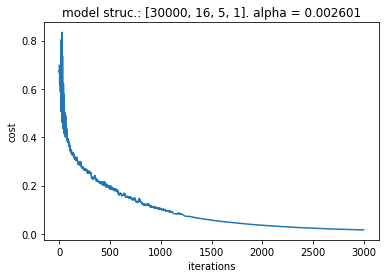

2 of 5 -------------------------------------------------- 2020-04-03 18:52:03.461863
Iteration 0 : Cost: 0.6871, Train Acc.: 58.4936%
Iteration 1000 : Cost: 0.1815, Train Acc.: 94.2308%
Iteration 2000 : Cost: 0.0668, Train Acc.: 99.1987%
Train Accuracy: 99.6795%
Test Accuracy: 83.9744%


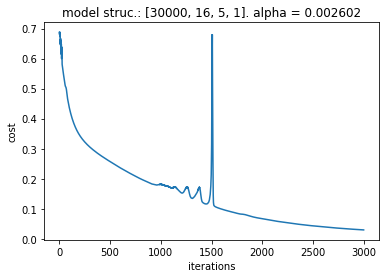

3 of 5 -------------------------------------------------- 2020-04-03 18:54:50.490966
Iteration 0 : Cost: 1.2617, Train Acc.: 50.0%
Iteration 1000 : Cost: 0.1689, Train Acc.: 93.75%
Iteration 2000 : Cost: 0.0578, Train Acc.: 99.1987%
Train Accuracy: 100.0%
Test Accuracy: 80.1282%


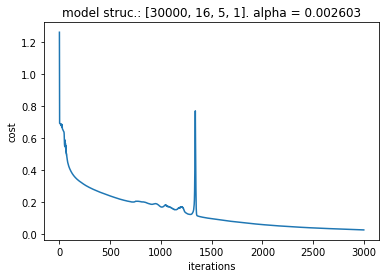

4 of 5 -------------------------------------------------- 2020-04-03 18:57:41.979083
Iteration 0 : Cost: 0.936, Train Acc.: 50.0%
Iteration 1000 : Cost: 0.1563, Train Acc.: 95.0321%
Iteration 2000 : Cost: 0.0563, Train Acc.: 99.359%
Train Accuracy: 100.0%
Test Accuracy: 83.3333%


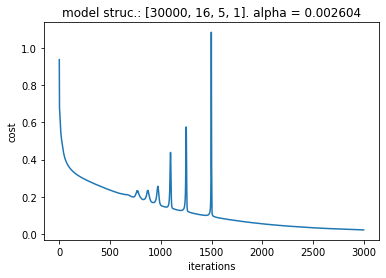

5 of 5 -------------------------------------------------- 2020-04-03 19:00:30.925152
Iteration 0 : Cost: 0.6889, Train Acc.: 56.5705%
Iteration 1000 : Cost: 0.1715, Train Acc.: 93.109%
Iteration 2000 : Cost: 0.0427, Train Acc.: 99.8397%
Train Accuracy: 100.0%
Test Accuracy: 85.2564%


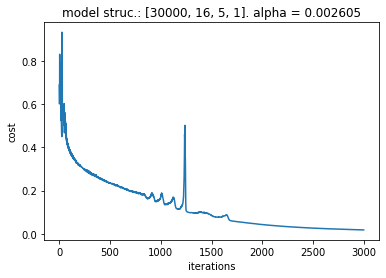

In [153]:
tuning_model6 = deep_nn_model_exp(train_set_x, train_set_y, test_set_x, test_set_y,
                                   layer_structures = [[16, 5, 1]],
                                   epochs_range = (3000, 600), epochs_sets = 1, alpha_range = (0.002601, 0.002605), alpha_sets = 5,
                                   lambd = 0.0, dropout_layers = [], keep_prob = 1.0,
                                   print_cost = True, print_every = 1000, show_plots = True)

### Analysing the tuned models

In [156]:
tuning_model6_df = models_summary(tuning_model6)[0]
tuning_model6_df.sort_values(['Test Accuracy', 'Train Accuracy'], ascending = False) # sorting the models by test accuracy then train accuracy.

Top models, based on Test then Train accuracies: [0]


,Model No.,Model Structure,Training Minutes,Number of Parameters,Train X Shape,Train Y Sahpe,Test X Shape,Test Y Sahpe,Iterations,alpha,P,Costs,Train Accuracy,Test Accuracy,Dropout Masks,Regularization Lambd,Keep Prob.,Dropout Layers
0,2020-04-03 18:52:03.461863,"(30000, 16, 5, 1)",0:02:45.422230,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.002601,"{'W1': [[0.005917121469973508, 0.0027337268069...","[0.6973857933533935, 0.6685944235914183, 0.678...",100.0000,91.0256,{},0.0,1.0,()
4,2020-04-03 19:03:21.745054,"(30000, 16, 5, 1)",0:02:50.614451,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.002605,"{'W1': [[0.00917202652242273, -0.0160200852766...","[0.6888556812337121, 0.6321212528309266, 0.601...",100.0000,85.2564,{},0.0,1.0,()
1,2020-04-03 18:54:50.489969,"(30000, 16, 5, 1)",0:02:46.867533,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.002602,"{'W1': [[-0.005176374594809659, -0.00112351536...","[0.6870818536929298, 0.6832636239910479, 0.681...",99.6795,83.9744,{},0.0,1.0,()
3,2020-04-03 19:00:30.924154,"(30000, 16, 5, 1)",0:02:48.785496,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.002604,"{'W1': [[0.00634459396013068, 0.01275241929848...","[0.9360135508753077, 0.7040924346233064, 0.679...",100.0000,83.3333,{},0.0,1.0,()
2,2020-04-03 18:57:41.979083,"(30000, 16, 5, 1)",0:02:51.327548,6,"(30000, 624)","(1, 624)","(30000, 156)","(1, 156)",3000,0.002603,"{'W1': [[-0.007486069609146797, 0.002699868667...","[1.2617049738502732, 0.6916851877350042, 0.691...",100.0000,80.1282,{},0.0,1.0,()


From the above, it seems that we manged to improve on the untuned model 6 by changing alpha from 0.0026 to 0.002601 which resulted in almost 1% improvement on the test accuracy! It's worth a thought that this minuscule change in the learning rate had this relatively huge jump in the accuracy. As for the other models, all were sub-bar compared to the untuned model 6. Therefore, the final model chosen is model indexed 0 in the above data frame.
 

In [158]:
final_model = tuning_model6_df.iloc[0] # saving the chosen model in 'final_model' variable to be used in predictions.
final_model

Model No.               2020-04-03 18:52:03.461863
Model Structure                  (30000, 16, 5, 1)
Training Minutes                    0:02:45.422230
Number of Parameters                             6
Train X Shape                         (30000, 624)
                                   ...            
Test Accuracy                              91.0256
Dropout Masks                                   {}
Regularization Lambd                             0
Keep Prob.                                       1
Dropout Layers                                  ()
Name: 0, Length: 18, dtype: object

## 9.	New images, not used in the train or test sets, are used to validate the tuned final model
Now on to the final step to shed off any doubt about the final model, validating on a set of unseen images and observing the predictions.

Pics Array shape: (7, 100, 100, 3)
Labels Array shape: (1, 7)
Shape of Flatten and Standardized array: (30000, 7)
Yhat: [[0 0 1 1 0 0 0]]


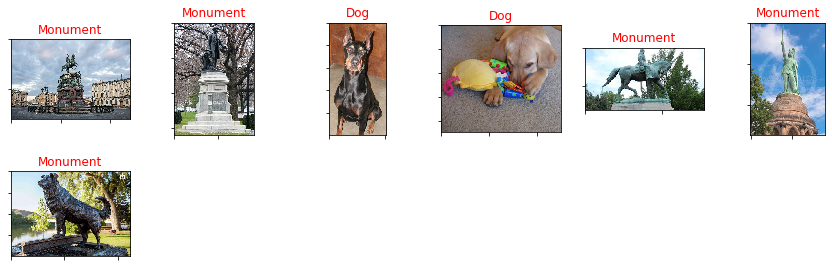

In [173]:
sample_path = path + '\\Test\\Test\\' # the path of the validation images.

Yhat = deep_nn_model_predict(sample_path, resize = 100, model = final_model) # for more info on this function, refer to repo nn_toolkit.

print('Yhat:', Yhat)

The final is working greatly, getting 100% on these images with some of them being a bit obscure, especially the last one!